#  Analysing Second Hand Car Sales Data

### Importing my libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np                   
import sklearn.linear_model
import pandas as pd
import seaborn as sns

### Reading in my data

In [2]:
car_df = pd.read_csv("car_sales_data.csv")
car_df

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630


In [3]:
car_df['Mileage'].max()

453537

### Data Inspection

In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


### Exploratory Data Analysis

#### Comparing the prices of cars based on numerical variables

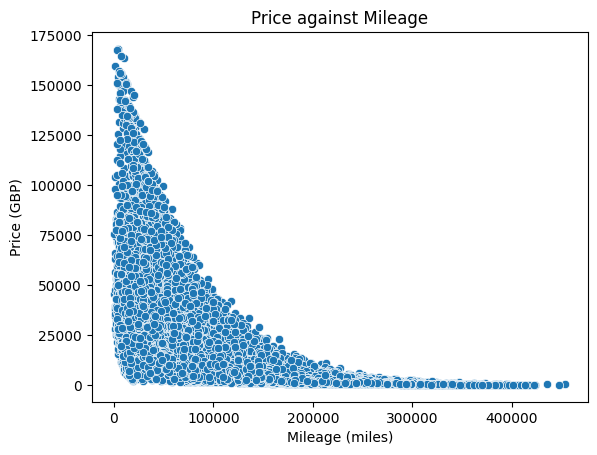

In [5]:
# Creating a scatter plot of Price vs Mileage

sns.scatterplot(data = car_df, x = "Mileage", y = "Price")

# Labeling both axes

plt.xlabel("Mileage (miles)")
plt.ylabel("Price (GBP)")

# Naming my graph
plt.title("Price against Mileage")

plt.show()

In [6]:
# The graph shows that the cars with high mileage have lower selling prices, however cars with lower mileage show higher selling prices.

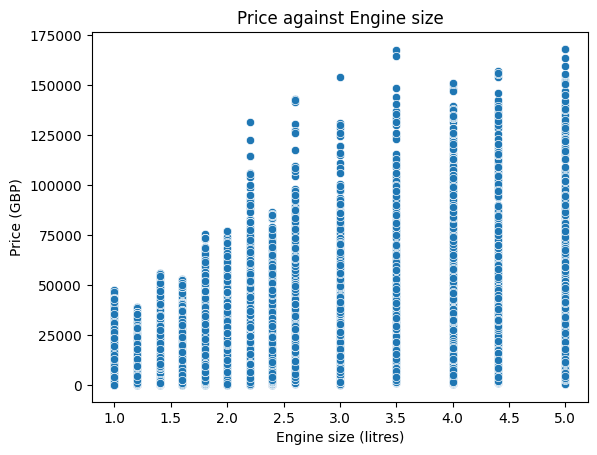

In [7]:
# Creating a scatter plot of Price vs Engine size

sns.scatterplot(data = car_df, x = "Engine size", y = "Price")

# Labeling both axes

plt.xlabel("Engine size (litres)")
plt.ylabel("Price (GBP)")

# Naming my graph
plt.title("Price against Engine size")

plt.show()

In [8]:
# The graph shows that the cars with high engine size also have higher selling prices, however cars with lower engine size have low selling prices.

### Determining the strength of trends between numerical variables

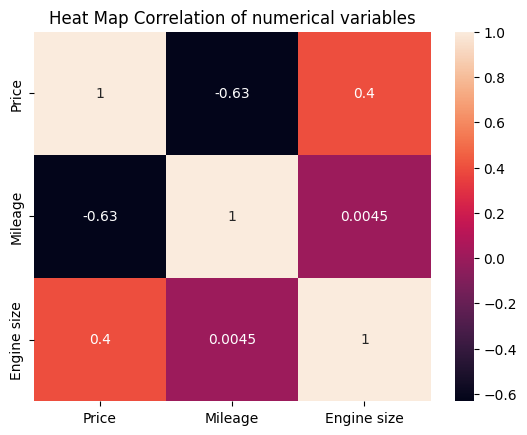

In [9]:
column_list = ["Price", "Mileage", "Engine size"]

# Calculating the correlation coefficients, and plotting using Seaborn's heatmap() function

sns.heatmap(car_df[column_list].corr(), annot = True)
plt.title("Heat Map Correlation of numerical variables")
plt.show()

## QUESTION A

### Linear Regression Model: Price vs Mileage

In [10]:
# Extracting the input feature

x = car_df["Mileage"]

# Extracting the output feature

y = car_df["Price"]

# Converting x to a numpy array and re-shaping it to 2 dimensions.

x = x.to_numpy().reshape(-1, 1)

In [11]:
# Importing the train_test_split function from the sklearn library

from sklearn.model_selection import train_test_split

# Spliting the x and y arrays between the train and test sets, using 20% of the data for the testing set, and 80% for the training set.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Checking the size of the training and testing sets.

print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the testing set." % (len(x_test), ))

There are 40000 data points in the training set.
There are 10000 data points in the testing set.


In [12]:
# Standardizing the input variable (Mileage) such that it has a mean of zero and a standard deviation of one.

# Importing the StandardScaler class from sklearn

from sklearn.preprocessing import StandardScaler

# Creating an instance of the StandardScaler class

scale = StandardScaler()

# Fitting the standard scaler to the input data that we have in x

scale.fit(x_train)

# Applying the standard scaler transformation to both the training and the testing sets

x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

In [13]:
# Building our linear regression model and training it on the training dataset

from sklearn.linear_model import LinearRegression

# Creating an instance of the model

car_linear = LinearRegression()

# Fitting the model to the training data

car_linear.fit(x_train_scaled, y_train)

LinearRegression()

In [14]:
# Fitting coefficients from the best-fit model

gradient = car_linear.coef_[0]
intercept = car_linear.intercept_

# Printing the coefficients

print("gradient: ", gradient)
print("intercept: ", intercept)

gradient:  -10374.075445707327
intercept:  13854.6287


In [15]:
# Importing the metrics for mean absolute error, the mean squared error, the root mean squared error, and the Coefficient of Determination (R2)from the sklearn library

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Using the final, trained model to predict the outputs (price) in the testing dataset

car_pred = car_linear.predict(x_test_scaled)

# Calculating the mean absolute error

mean_abs = mean_absolute_error(y_test, car_pred)

# Calculating the mean squared error

mean_squared = mean_squared_error(y_test, car_pred)

# Calculating root mean squared error

rms_error = np.sqrt(mean_squared)

# Calculating the R2 score

R2 = r2_score(y_test, car_pred)

# Printing the results of these metrics

print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  7964.78467002469
Mean squared error:  162468566.87254104
Root mean squared error:  12746.315815659875
R2:  0.4013139100884707


#### Creating a plot that shows our best-fit linear regression line compared to the data

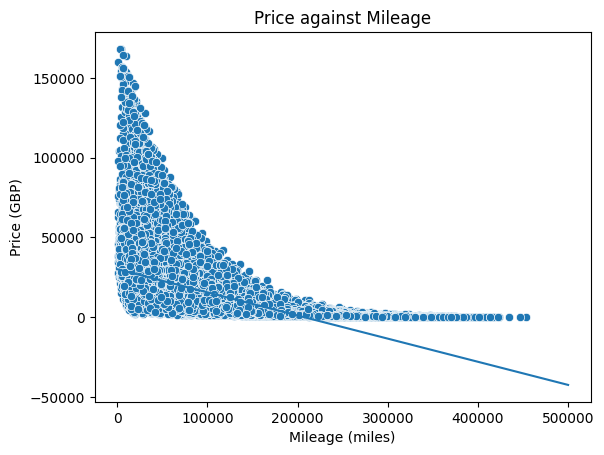

In [16]:
# Creating an array of values covering the range of Mileage in the dataset, and reshaping the array so it has 2 dimensions

x_fit = np.arange(0, 500000, 1).reshape(-1, 1)

# Applying the standardisation transformation using the same StandardScaler that I used on the training and testing data

x_fit_scaled = scale.transform(x_fit)

# Applying the trained model to this scaled input array to give the y-values for the best-fit line

y_fit = car_linear.predict(x_fit_scaled)

# Using seaborn to create a scatter plot of Price versus Mileage

sns.scatterplot(data = car_df, x = "Mileage", y = "Price")

# Plotting the best-fit line from the trained model

plt.plot(x_fit, y_fit)

# Labelling both axes

plt.xlabel("Mileage (miles)")
plt.ylabel("Price (GBP)")

# Naming my graph
plt.title("Price against Mileage")

plt.show()

### Linear Regression Model: Price vs Engine Size

In [17]:
# Extracting the input feature

x1 = car_df["Engine size"]

# Extracting the output feature

y1 = car_df["Price"]

# Reshaping x so that it has 2 dimensions

x1 = x1.to_numpy().reshape(-1, 1)

# Splitting the x and y data between the training and testing datasets

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

# Creating an instance of the StandardScaler class

scale = StandardScaler()

# Fitting the standard scaler to the input data that we have in x_train

scale.fit(x1_train)

# Applying the standard scaler transformation to both the training and the testing sets

x1_train_scaled = scale.transform(x1_train)
x1_test_scaled = scale.transform(x1_test)

# Creating an instance of the model

car_linear1 = LinearRegression()

# Fitting the model to the training data

car_linear1.fit(x1_train_scaled, y1_train)

# Getting the fit coefficients from the best-fit model

gradient = car_linear1.coef_[0]
intercept = car_linear1.intercept_

# Printing the coefficients

print("gradient: ", gradient)
print("intercept: ", intercept)

# Using the final, trained model to predict the output (Price) in the testing dataset

car_pred1 = car_linear1.predict(x1_test_scaled)

# Calculating the mean absolute error

mean_abs1 = mean_absolute_error(y1_test, car_pred1)

# Calculating the mean squared error

mean_squared1 = mean_squared_error(y1_test, car_pred1)

# Calculating the root mean squared error

rms_error1 = np.sqrt(mean_squared1)

# Calculating the R2 score

R2_1 = r2_score(y1_test, car_pred1)

# Printing the results of these metrics

print("Mean absolute error: ", mean_abs1)
print("Mean squared error: ", mean_squared1)
print("Root mean squared error: ", rms_error1)
print("R2: ", R2_1)

gradient:  6575.659995991372
intercept:  13854.6287
Mean absolute error:  10817.491562557909
Mean squared error:  230499154.45279127
Root mean squared error:  15182.198604049128
R2:  0.15062562461380213


#### Creating a plot that shows our best-fit linear regression line compared to the data

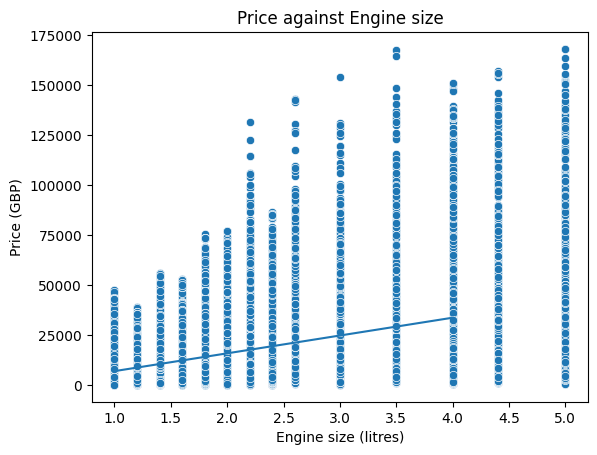

In [18]:
# Creating an array of values covering the range of Engine size that I found in the dataset

x1_fit = np.arange(1, 5, 1).reshape(-1, 1)

# Applying the standardisation transformation using the same StandardScaler that I used on the training and testing data

x1_fit_scaled = scale.transform(x1_fit)

# Applying the trained model to this scaled input array which will give us the y-values for the best-fit line

y1_fit = car_linear1.predict(x1_fit_scaled)

# Using seaborn to create a scatter plot of Price versus Engine size

sns.scatterplot(data = car_df, x = "Engine size", y = "Price")

# Plotting the best-fit line from the trained model

plt.plot(x1_fit, y1_fit)

# Labelling both axes

plt.xlabel("Engine size (litres)")
plt.ylabel("Price (GBP)")

# Naming my graph

plt.title("Price against Engine size")

# Show the plot

plt.show()

### Polynomial Regression Model: Price vs Mileage

In [19]:
# Extracting the input feature

x2 = car_df["Mileage"]

# Extracting the output feature

y2 = car_df["Price"]

# Reshaping to 2 dimension

x2 = x2.to_numpy().reshape(-1, 1)

# Spliting into training and testing datasets

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

# Creating an instance of the StandardScaler class

scale = StandardScaler()

# Fitting the standard scaler to the input data 

scale.fit(x2_train)
# Applying the standard scaler transformation to both the training and the testing sets

x2_train_scaled = scale.transform(x2_train)
x2_test_scaled = scale.transform(x2_test)

In [20]:
# Importing the PolynomialFeatures class from the sklearn library

from sklearn.preprocessing import PolynomialFeatures

# Creating an instance of the PolynomialFeatures class

poly = PolynomialFeatures(degree = 2, include_bias = False)

# Apply PolynomialFeatures transformation to scaled input data from the training set

x2_poly = poly.fit_transform(x2_train_scaled)

In [21]:
# Creating an instance of the LinearRegression model

car_poly2 = LinearRegression()

# Fitting the model to the training data

car_poly2.fit(x2_poly, y2_train)

LinearRegression()

In [22]:
# Getting the fit coefficients from the best-fit model

coefficients = car_poly2.coef_
intercept = car_poly2.intercept_

# Printing the coefficients

print("coefficients: ", coefficients)
print("intercept: ", intercept)

coefficients:  [-13630.81884183   4476.1506104 ]
intercept:  9378.47808959823


In [23]:
# Creating the polynomial features from the scaled inputs features

x2_test_poly = poly.fit_transform(x2_test_scaled)

car_pred2 = car_poly2.predict(x2_test_poly)

# Calculating the mean absolute error

mean_abs2 = mean_absolute_error(y2_test, car_pred2)

# Calculating the mean squared error

mean_squared2 = mean_squared_error(y2_test, car_pred2)

# Calculating the root mean squared error

rms_error2 = np.sqrt(mean_squared2)

# Calculating the R2 score

R2_2 = r2_score(y2_test, car_pred2)

# Printing the results of these metrics

print("Mean absolute error: ", mean_abs2)
print("Mean squared error: ", mean_squared2)
print("Root mean squared error: ", rms_error2)
print("R2: ", R2_2)

Mean absolute error:  6409.911605271262
Mean squared error:  129620312.1626197
Root mean squared error:  11385.091662460154
R2:  0.5223575898060919


#### Creating a plot that shows our best-fit polynomial regression line compared to the data

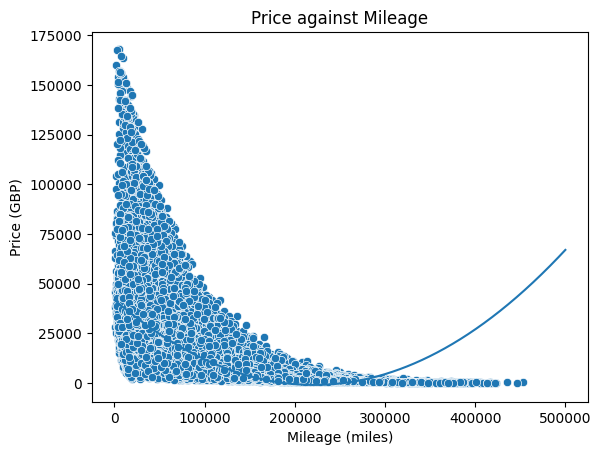

In [24]:
# Creating an array of values covering the range in the dataset

x2_fit = np.arange(0, 500000, 1).reshape(-1, 1)

# Applying the standardisation transformation using the same StandardScaler that I used on the training and testing data

x2_fit_scaled = scale.transform(x2_fit)

# Creating the polyomial features and applying them to the trained model

x2_fit_poly = poly.fit_transform(x2_fit_scaled)

y2_fit = car_poly2.predict(x2_fit_poly)

# Using seaborn to create a scatter plot of Price versus Mileage

sns.scatterplot(data = car_df, x = "Mileage", y = "Price")

# Plotting the best-fit line from the trained model

plt.plot(x2_fit, y2_fit)

# Labelling both axes

plt.xlabel("Mileage (miles)")
plt.ylabel("Price (GBP)")

# Naming my graph

plt.title("Price against Mileage")

# Showing the plot
plt.show()

### Polynomial Regression Model: Price vs Engine Size

In [25]:
# Extracting the input feature

x3 = car_df["Engine size"]

# Extracting the output feature

y3 = car_df["Price"]

# Reshaping to 2 dimension

x3 = x3.to_numpy().reshape(-1, 1)

# Spliting into training and testing datasets

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.2, random_state = 42)

# Creating an instance of the StandardScaler class

scale = StandardScaler()

# Fitting the standard scaler to the input data 

scale.fit(x3_train)

# Applying the standard scaler transformation to both the training and the testing sets

x3_train_scaled = scale.transform(x3_train)
x3_test_scaled = scale.transform(x3_test)

In [26]:
# Creating an instance of the PolynomialFeatures class

poly = PolynomialFeatures(degree = 2, include_bias = False)

# Apply PolynomialFeatures transformation to scaled input data from the training set

x3_poly = poly.fit_transform(x3_train_scaled)

In [27]:
# Creating an instance of the LinearRegression model

car_poly3 = LinearRegression()

# Fitting the model to the training data

car_poly3.fit(x3_poly, y3_train)

LinearRegression()

In [28]:
# Getting the fit coefficients from the best-fit model

coefficients = car_poly3.coef_
intercept = car_poly3.intercept_

# Printing the coefficients

print("coefficients: ", coefficients)
print("intercept: ", intercept)

coefficients:  [6079.69940101  238.69551851]
intercept:  13615.933181493827


In [29]:
# Creating the polynomial features from the scaled inputs features

x3_test_poly = poly.fit_transform(x3_test_scaled)

car_pred3 = car_poly3.predict(x3_test_poly)

# Calculating the mean absolute error

mean_abs3 = mean_absolute_error(y3_test, car_pred3)

# Calculating the mean squared error

mean_squared3 = mean_squared_error(y3_test, car_pred3)

# Calculating the root mean squared error

rms_error3 = np.sqrt(mean_squared3)

# Calculating the R2 score

R2_3 = r2_score(y3_test, car_pred3)

# Printing the results of these metrics

print("Mean absolute error: ", mean_abs3)
print("Mean squared error: ", mean_squared3)
print("Root mean squared error: ", rms_error3)
print("R2: ", R2_3)

Mean absolute error:  10807.262347148684
Mean squared error:  230326165.99946904
Root mean squared error:  15176.500452985498
R2:  0.15126307580028653


#### Creating a plot that shows our best-fit polynomial regression line compared to the data

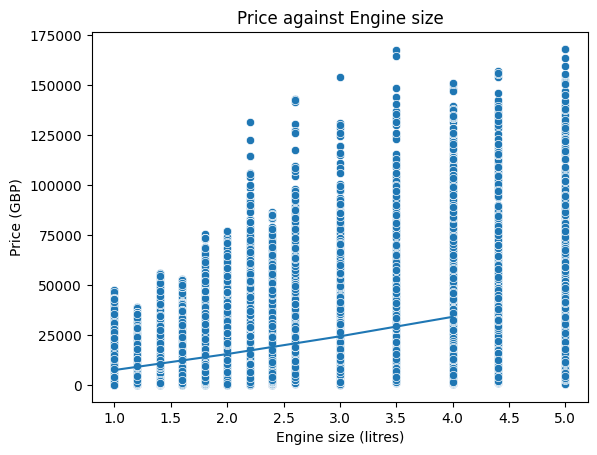

In [30]:
# Creating an array of values covering the range in the dataset

x3_fit = np.arange(1, 5, 1).reshape(-1, 1)

# Applying the standardisation transformation using the same StandardScaler that I used on the training and testing data

x3_fit_scaled = scale.transform(x3_fit)

# Creating the polyomial features and applying them to the trained model

x3_fit_poly = poly.fit_transform(x3_fit_scaled)

y3_fit = car_poly3.predict(x3_fit_poly)

# Using seaborn to create a scatter plot of Price versus Engine size

sns.scatterplot(data = car_df, x = "Engine size", y = "Price")

# Plotting the best-fit line from the trained model

plt.plot(x3_fit, y3_fit)

# Labelling both axes

plt.xlabel("Engine size (litres)")
plt.ylabel("Price (GBP)")

# Naming my graph

plt.title("Price against Engine size")

# Showing the plot
plt.show()

 ## QUESTION B

### CONSIDERING MULTIPLE NUMERICAL VARIABLE

In [31]:
# Extracting the input features

feature_names = ["Mileage", "Engine size"]

x4 = car_df[feature_names]

# Extracting the output feature

y4 = car_df["Price"]

# Splitting the x and y data between the training and testing datasets

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.2,random_state = 42)

# Creating an instance of the StandardScaler class

scale = StandardScaler()

# Fitting the standard scaler to the input data in x_train

scale.fit(x4_train)

# Applying the standard scaler transformation to both the training and the testing sets

x4_train_scaled = scale.transform(x4_train)

x4_test_scaled = scale.transform(x4_test)

# Creating an instance of the model

car_linear4 = LinearRegression()

# Fitting the model to the training data

car_linear4.fit(x4_train_scaled, y4_train)

# Getting the fit coefficients from the best-fit model

intercept = car_linear4.intercept_
coefficients = car_linear4.coef_

# Printing the coefficients

print("coefficients: ", coefficients)
print("intercept: ", intercept)

# Using the final, trained model to predict the outputs in the testing dataset

car_pred4 = car_linear4.predict(x4_test_scaled)

# Calculating the mean absolute error

mean_abs4 = mean_absolute_error(y4_test, car_pred4)

# Calculating the mean squared error

mean_squared4 = mean_squared_error(y4_test, car_pred4)

# Calculating the root mean squared error

rms_error4 = np.sqrt(mean_squared4)

# Calculate the R2 score
R2_4 = r2_score(y4_test, car_pred4)

# Printing the results

print("Mean absolute error: ", mean_abs4)
print("Mean squared error: ", mean_squared4)
print("Root mean squared error: ", rms_error4)
print("R2: ", R2_4)

coefficients:  [-10403.8219697    6622.39198355]
intercept:  13854.6287
Mean absolute error:  7161.551690393779
Mean squared error:  120988641.74191812
Root mean squared error:  10999.48370342527
R2:  0.5541647332619023


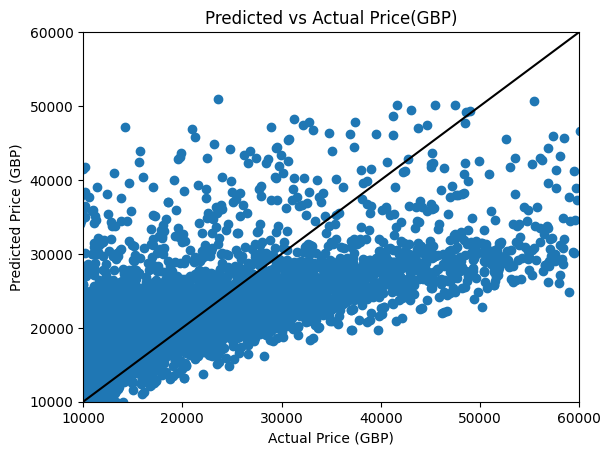

In [32]:
# Creating a scatterplot comparing the predicted and actual values of the output variable

plt.scatter(y4_test, car_pred4)

# Adding a straight diagonal line to the plot

plt.plot([10000, 60000], [10000, 60000], 'k-')

# Labelling both axes

plt.xlabel("Actual Price (GBP)")

plt.ylabel("Predicted Price (GBP)")

# Limiting the range of values on both axes

plt.xlim(10000, 60000)
plt.ylim(10000, 60000)

plt.title("Predicted vs Actual Price(GBP)")

plt.show()

## QUESTION C

## Using both categorical and numerical variables (Random ForestRegressor model)

In [33]:
# Extracting the input and output features

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

car_df["Model"] = label_encoder.fit_transform(car_df["Model"])
car_df["Fuel type"] = label_encoder.fit_transform(car_df["Fuel type"])
car_df["Manufacturer"] = label_encoder.fit_transform(car_df["Manufacturer"])
car_df["Year of manufacture"] = label_encoder.fit_transform(car_df["Year of manufacture"])     

In [34]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

In [35]:
# Using all input variables, both categorical and numerical

rf_feature_names = ["Engine size", "Mileage","Year of manufacture", "Model", "Fuel type","Manufacturer"]

x_rf = car_df[rf_feature_names]

In [36]:
x_rf_train, x_rf_test = train_test_split(x_rf, test_size = 0.2,random_state = 42)

# Creating an instance of the StandardScaler class

scale = StandardScaler()

# Fitting the standard scaler to the input data in x_train

scale.fit(x_rf)

# Applying the standard scaler transformation 

x_rf_train_scaled = scale.transform(x_rf_train)

x_rf_test_scaled = scale.transform(x_rf_test)

Model_rf = RandomForestRegressor(random_state = 42)
Model_rf.fit(x_rf_train_scaled, y_train)

# Using the final, trained model to predict the outputs in the testing dataset

car_pred_rf = Model_rf.predict(x_rf_test_scaled)

# Calculating the mean absolute error

mean_abs_rf = mean_absolute_error(y_test, car_pred_rf)

# Calculating the mean squared error

mean_squared_rf = mean_squared_error(y_test, car_pred_rf)

# Calculating the root mean squared error

rms_error_rf = np.sqrt(mean_squared_rf)

# Calculate the R2 score
R2_rf = r2_score(y_test, car_pred_rf)

# Printing the results

print("Mean absolute error: ", mean_abs_rf)
print("Mean squared error: ", mean_squared_rf)
print("Root mean squared error: ", rms_error_rf)
print("R2: ", R2_rf)

Mean absolute error:  333.197684
Mean squared error:  479983.5019482201
Root mean squared error:  692.808416481945
R2:  0.9982312920490715


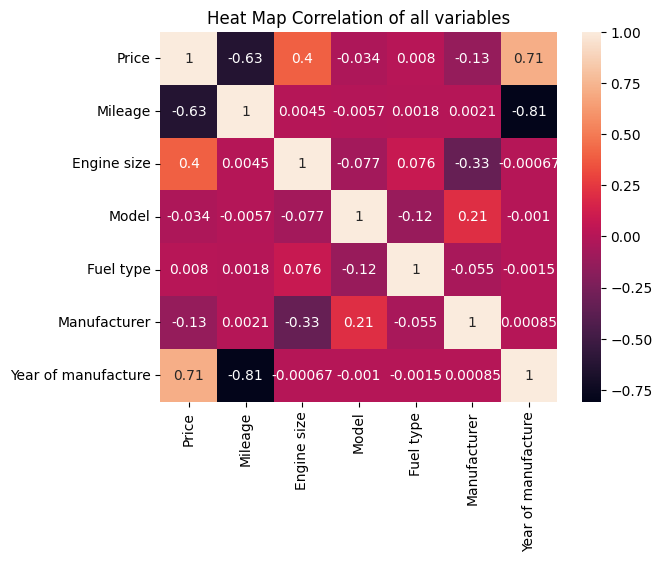

In [37]:
# Using the heatmap to determine the most relevant input variables

rf_column_list = ["Price", "Mileage", "Engine size", "Model", "Fuel type", "Manufacturer", "Year of manufacture"]

# Calculating the correlation coefficients, and plotting using Seaborn's heatmap() function

sns.heatmap(car_df[rf_column_list].corr(), annot = True)
plt.title("Heat Map Correlation of all variables")
plt.show()

In [38]:
# From the heat map, it is clear that the most relevant input variables for predicting Price is the Mileage, Engine size and year of manufacture

rf1_feature_names = ["Engine size", "Mileage","Year of manufacture"]

x1_rf = car_df[rf1_feature_names]

In [39]:
x1_rf_train, x1_rf_test = train_test_split(x1_rf, test_size = 0.2,random_state = 42)

# Creating an instance of the StandardScaler class

scale = StandardScaler()

# Fitting the standard scaler to the input data in x_train

scale.fit(x1_rf)

# Applying the standard scaler transformation 

x1_rf_train_scaled = scale.transform(x1_rf_train)

x1_rf_test_scaled = scale.transform(x1_rf_test)

Model_rf1 = RandomForestRegressor(random_state = 42)
Model_rf1.fit(x1_rf_train_scaled, y_train)

# Using the final, trained model to predict the outputs in the testing dataset

car_pred_rf1 = Model_rf1.predict(x1_rf_test_scaled)

# Calculating the mean absolute error

mean_abs_rf1 = mean_absolute_error(y_test, car_pred_rf1)

# Calculating the mean squared error

mean_squared_rf1 = mean_squared_error(y_test, car_pred_rf1)

# Calculating the root mean squared error

rms_error_rf1 = np.sqrt(mean_squared_rf1)

# Calculate the R2 score
R2_rf1 = r2_score(y_test, car_pred_rf1)

# Printing the results

print("Mean absolute error: ", mean_abs_rf1)
print("Mean squared error: ", mean_squared_rf1)
print("Root mean squared error: ", rms_error_rf1)
print("R2: ", R2_rf1)

Mean absolute error:  2294.493561782143
Mean squared error:  20156051.62298098
Root mean squared error:  4489.549155870885
R2:  0.9257262622148673


## QUESTION D

## ARTIFICIAL NEURAL NETWORK

In [40]:
feature_names = ["Engine size", "Mileage", "Model", "Fuel type", "Manufacturer","Year of manufacture"]

x6 = car_df[feature_names]

y6 = car_df["Price"]

In [41]:
# Spliting between train and test

x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size = 0.2, random_state = 42)

# Import the MinMaxScaler class from sklearn

from sklearn.preprocessing import MinMaxScaler

# Creating an instance of the MinMaxScaler class

scale6 = MinMaxScaler()

# Fitting the min-max scaler to the input data in x_train

scale6.fit(x6_train)

x6_train_scaled = scale6.transform(x6_train)
x6_test_scaled = scale6.transform(x6_test)

In [42]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [43]:
# Building the neural network model

model = Sequential()

# Adding the first hidden layer of the network

model.add(Dense(units = 64, input_dim = (6), activation = "relu"))

# Adding a dropout layer

model.add(Dropout(0.2))

# Adding the remaining hidden layers

model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))

# Adding the output layer

model.add(Dense(units = 1, activation = "linear"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 6

In [44]:
# Compiling the model,using the Adam optimizer

model.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')

from keras.callbacks import EarlyStopping

# Defining the early stopping criterion. We will monitor the Validation Loss, and we will use a patience of 20

early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Training the model

history = model.fit(x = x6_train_scaled, y = y6_train, batch_size = None, epochs= 200, verbose = "auto", validation_split = 0.1, callbacks =[early_stopping])

Epoch 1/200
1125/1125 [==============================] - 3s 2ms/step - loss: 105886968.0000 - mean_squared_error: 105886968.0000 - val_loss: 23699412.0000 - val_mean_squared_error: 23699412.0000
Epoch 2/200
1125/1125 [==============================] - 2s 1ms/step - loss: 26049436.0000 - mean_squared_error: 26049436.0000 - val_loss: 17877522.0000 - val_mean_squared_error: 17877522.0000
Epoch 3/200
1125/1125 [==============================] - 2s 2ms/step - loss: 21419876.0000 - mean_squared_error: 21419876.0000 - val_loss: 15422040.0000 - val_mean_squared_error: 15422040.0000
Epoch 4/200
1125/1125 [==============================] - 2s 1ms/step - loss: 19024702.0000 - mean_squared_error: 19024702.0000 - val_loss: 14182303.0000 - val_mean_squared_error: 14182303.0000
Epoch 5/200
1125/1125 [==============================] - 2s 2ms/step - loss: 16946334.0000 - mean_squared_error: 16946334.0000 - val_loss: 13194891.0000 - val_mean_squared_error: 13194891.0000
Epoch 6/200
1125/1125 [==========

313/313 [==============================] - 0s 845us/step


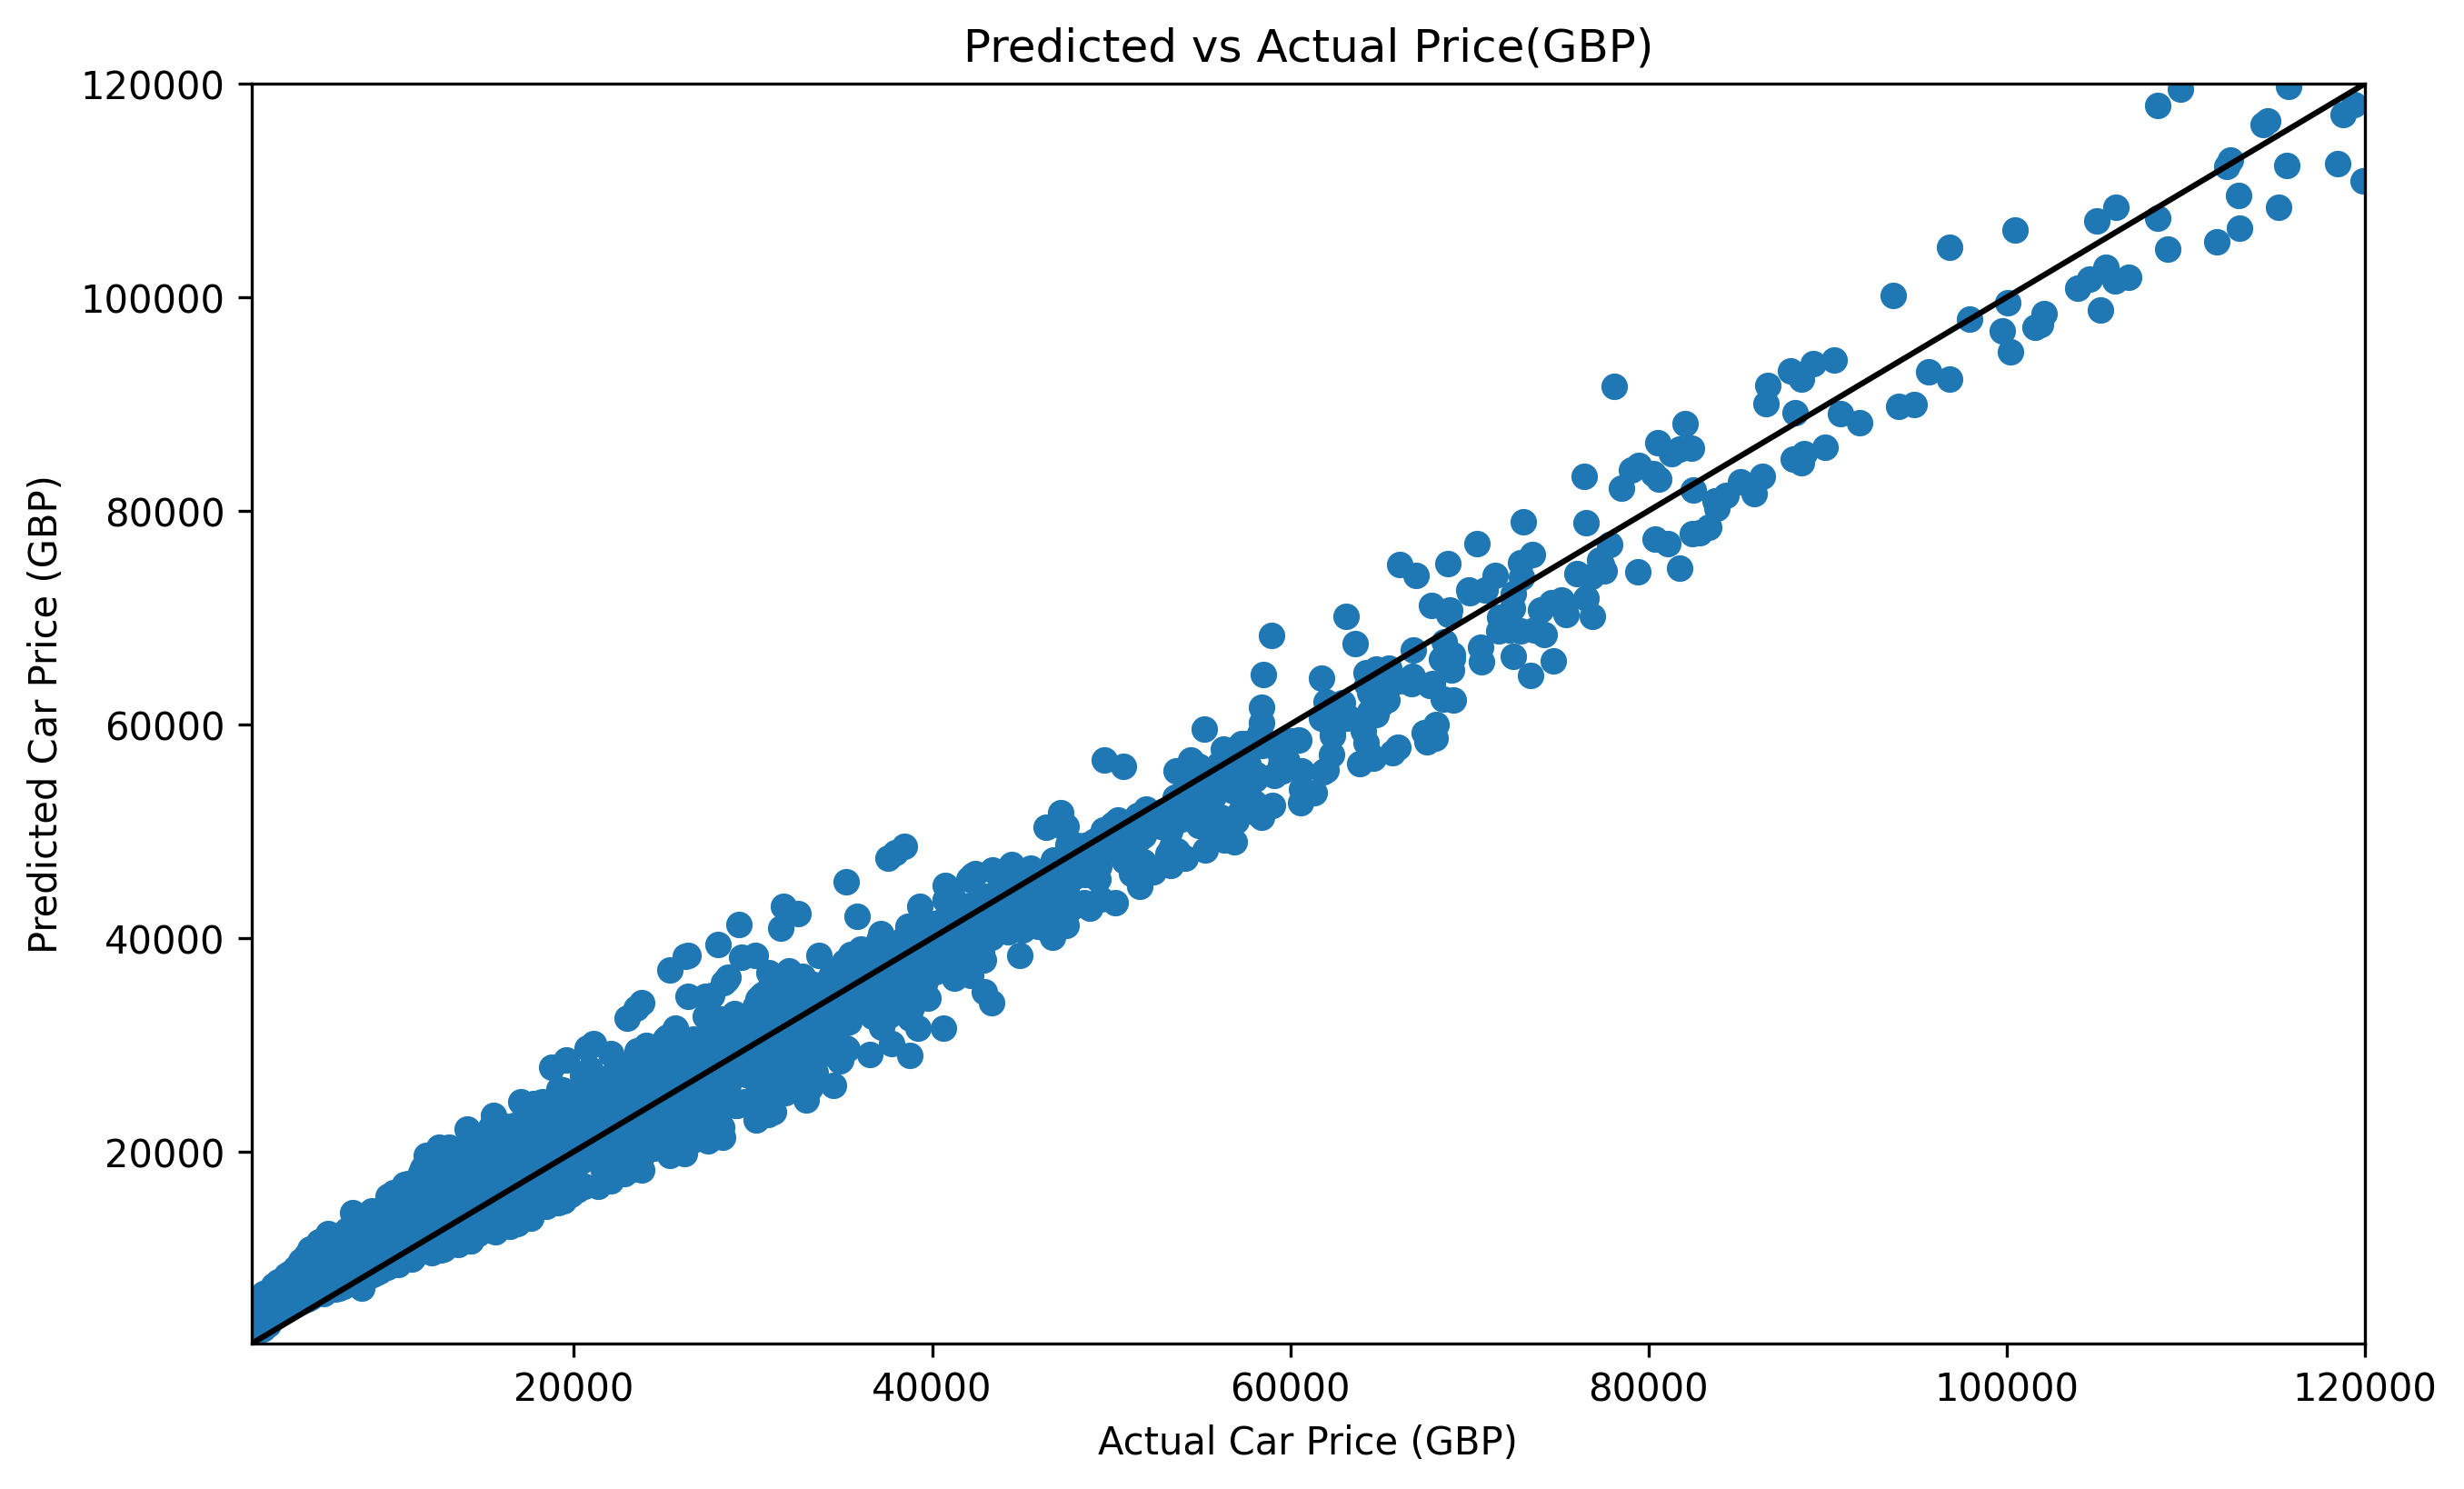

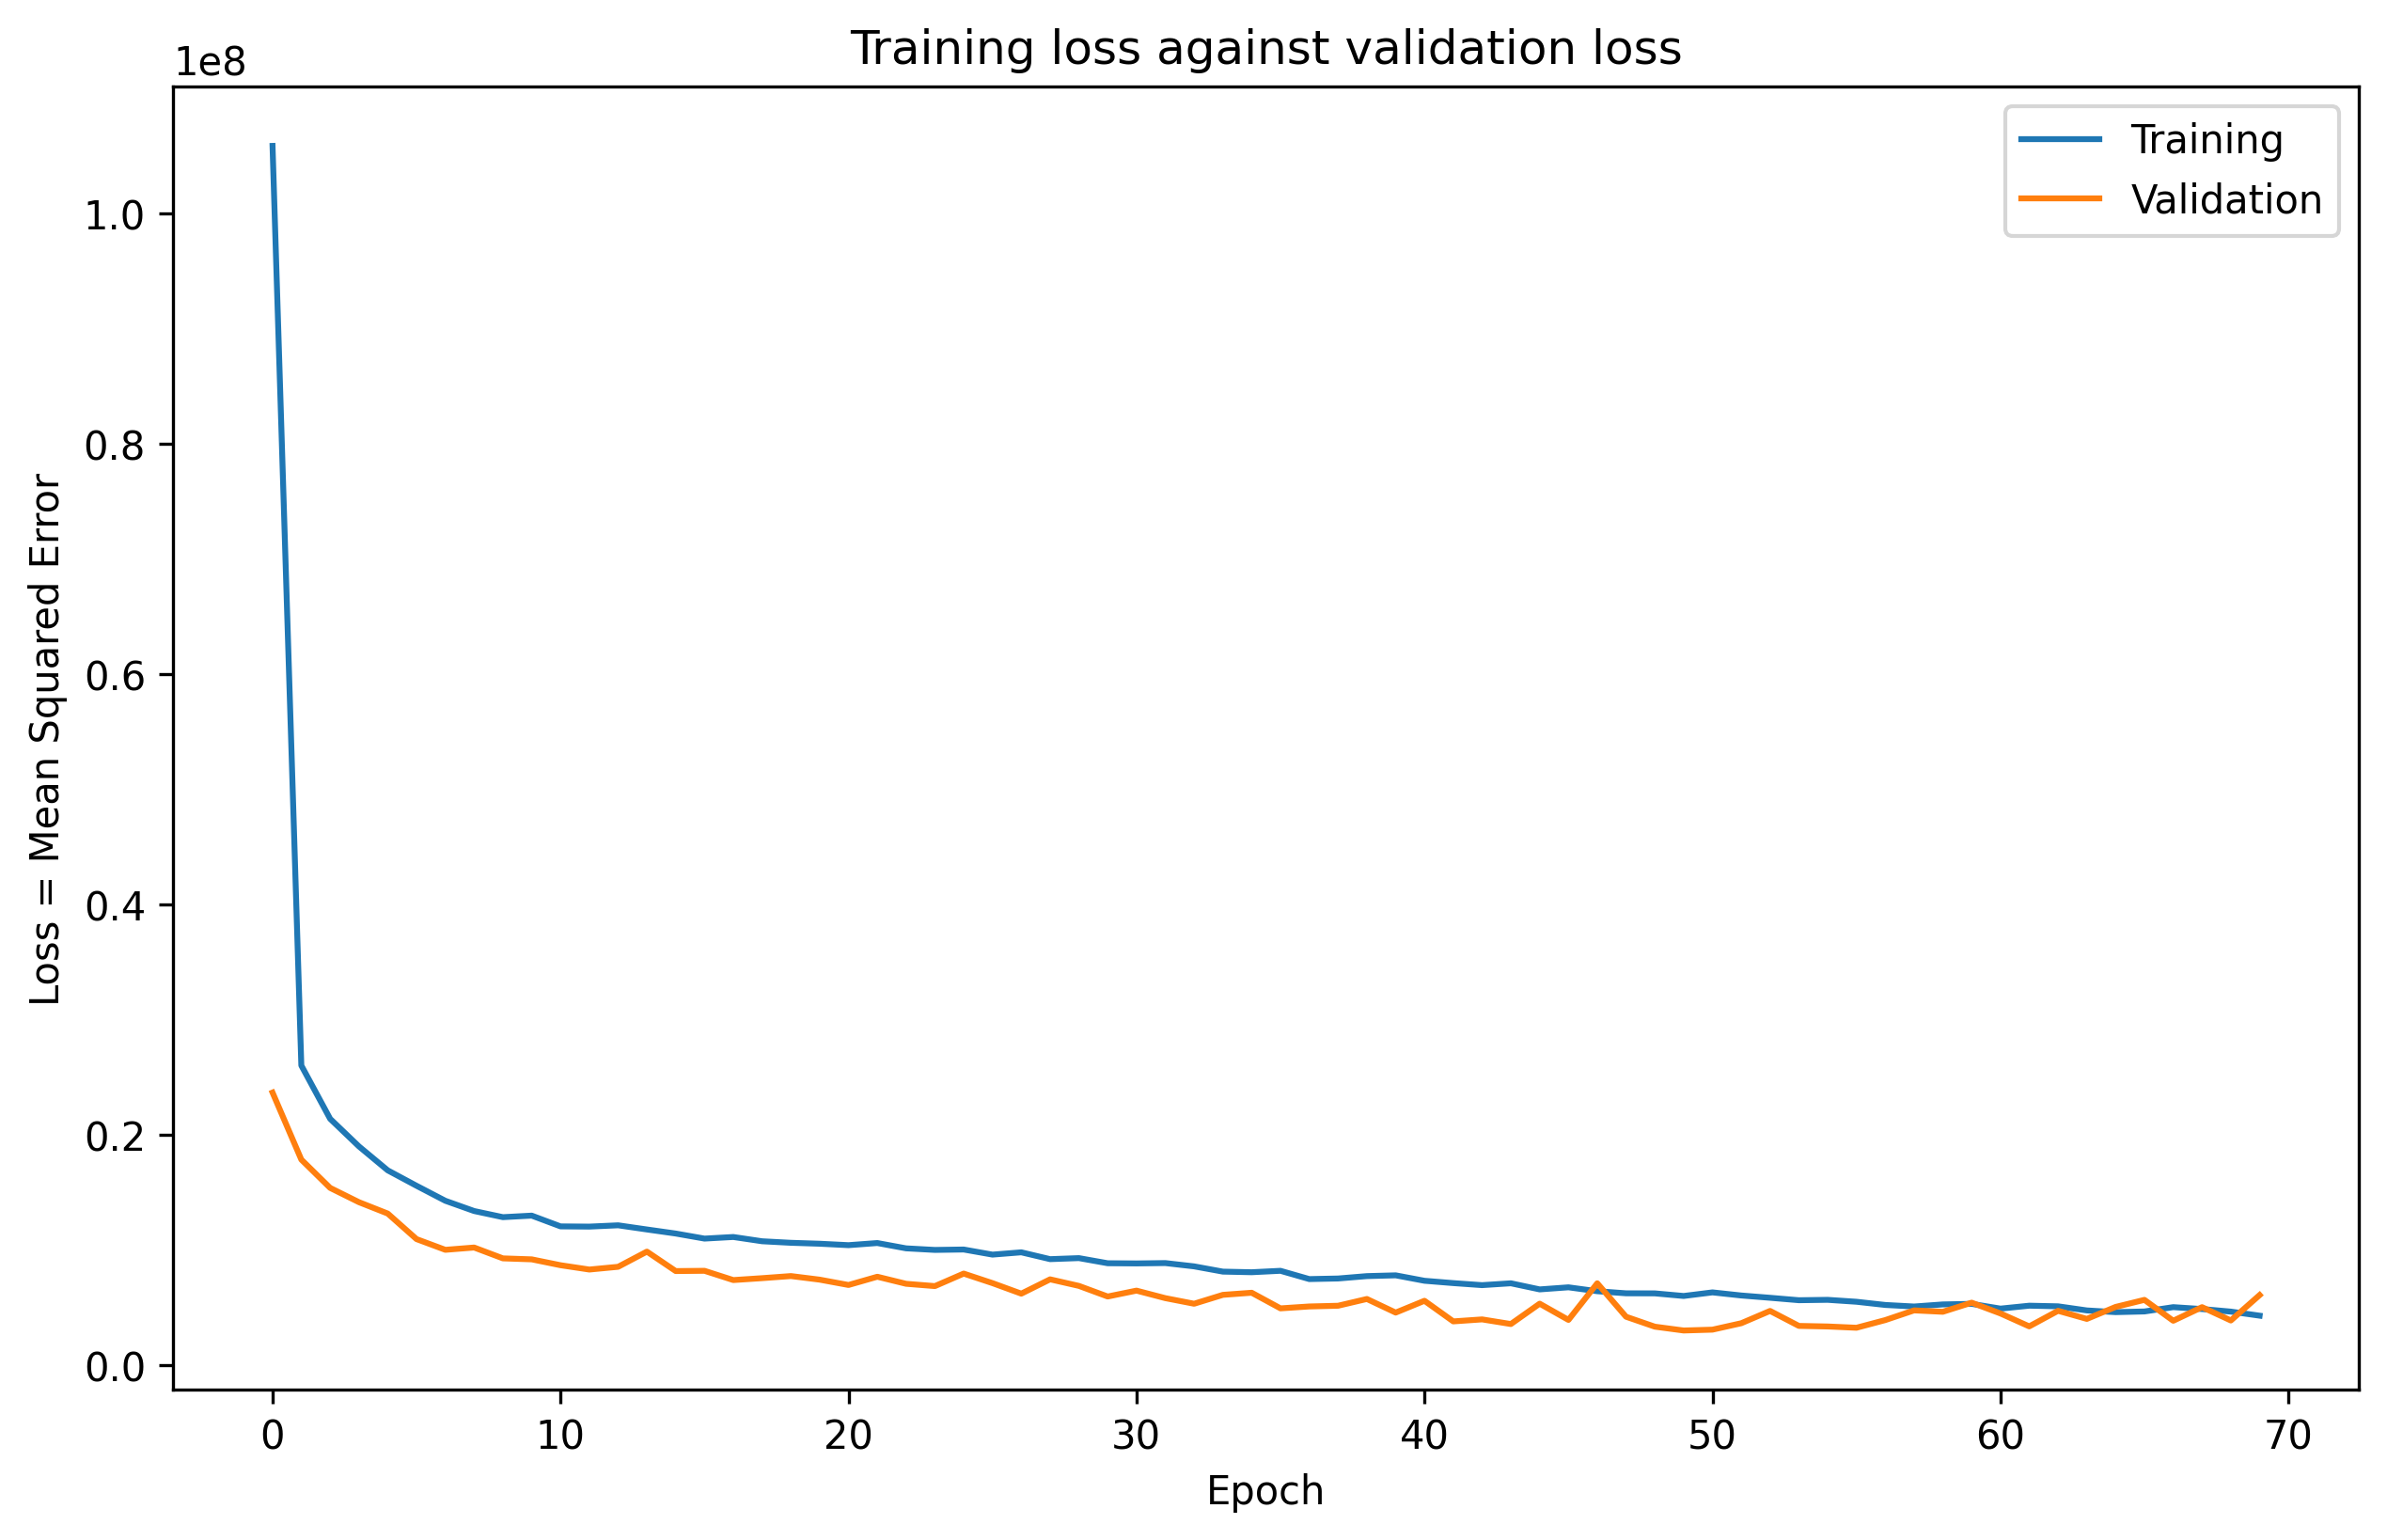

Mean absolute error:  2118.379349279785
Mean squared error:  6172032.490328865
Root mean squared error:  2484.3575608854826
R2:  0.9772564621602111


In [45]:
# Predicting the model outputs for the testing set

y6_pred = model.predict(x6_test_scaled)

# Using matplotlib to plot the predicted vs actual life car price

plt.figure(figsize = (10, 6), dpi = 300)

# Creatimg a scatterplot comparing the predicted and actual values of the output variable

plt.scatter(y6_test, y6_pred)

# Adding a straight diagonal line to the plot.

plt.plot([2000, 120000], [2000, 120000], 'k-')

# Labelling both axes.

plt.xlabel("Actual Car Price (GBP)")
plt.ylabel("Predicted Car Price (GBP)")

# Limiting the range of values on both axes

plt.xlim(2000, 120000)
plt.ylim(2000, 120000)

# Show the plotting
plt.title("Predicted vs Actual Price(GBP)")
plt.show()


# Creating a pandas dataframe containing the history of the fitting

history_df = pd.DataFrame(history.history)

# Using matplotlib to create a figure

plt.figure(figsize = (10, 6), dpi =300)

# Plot the history of the training and validation losses

plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Adding a legend to the plot

plt.legend()

# Labelling both axes

plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")

# Showing the plot
plt.title("Training loss against validation loss") 
plt.show()


# Calculating the mean absolute error

mean_abs6 = mean_absolute_error(y6_test, y6_pred)

# Calculating the mean squared error

mean_squared6 = mean_squared_error(y6_test, y6_pred)

# Calculating the root mean squared error

rms_error6 = np.sqrt(mean_squared6)

# Calculating the R2 score

R2_6 = r2_score(y6_test, y6_pred)

# Printing the results of these metrics

print("Mean absolute error: ", mean_abs6)
print("Mean squared error: ", mean_squared6)
print("Root mean squared error: ", rms_error6)
print("R2: ", R2_6)

# HYPERPARAMETER TUNING

## Adding one more hidden layer

In [46]:
# Creating an instance of the Sequential class.

model_2 = Sequential()
# Adding the first hidden layer, with input_dim = 6, 64 units, and the ReLU activation function

model_2.add(Dense(units = 64, input_dim = (6), activation = "relu"))

# Adding a dropout layer with a 20% dropout rate

model_2.add(Dropout(0.2))

# Adding other hidden layers with 64 units and the ReLU activation function

model_2.add(Dense(units = 64, activation = "relu"))
model_2.add(Dense(units = 64, activation = "relu"))
model_2.add(Dense(units = 64, activation = "relu"))
model_2.add(Dense(units = 64, activation = "relu"))
model_2.add(Dense(units = 64, activation = "relu"))

# Output layer

model_2.add(Dense(units = 1, activation = "linear"))

# Printing a summary of the model

model_2.summary()

# Compiling the model using the Adam optimizer

model_2.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')

# Defining the early stopping criterion, with a patience of 20

early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Training the model

history = model_2.fit(x = x6_train_scaled, y = y6_train, 
                    batch_size = None, epochs= 200,
                    verbose = "auto", 
                    validation_split = 0.1, 
                    callbacks =[early_stopping])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                448       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 64)               

313/313 [==============================] - 0s 915us/step


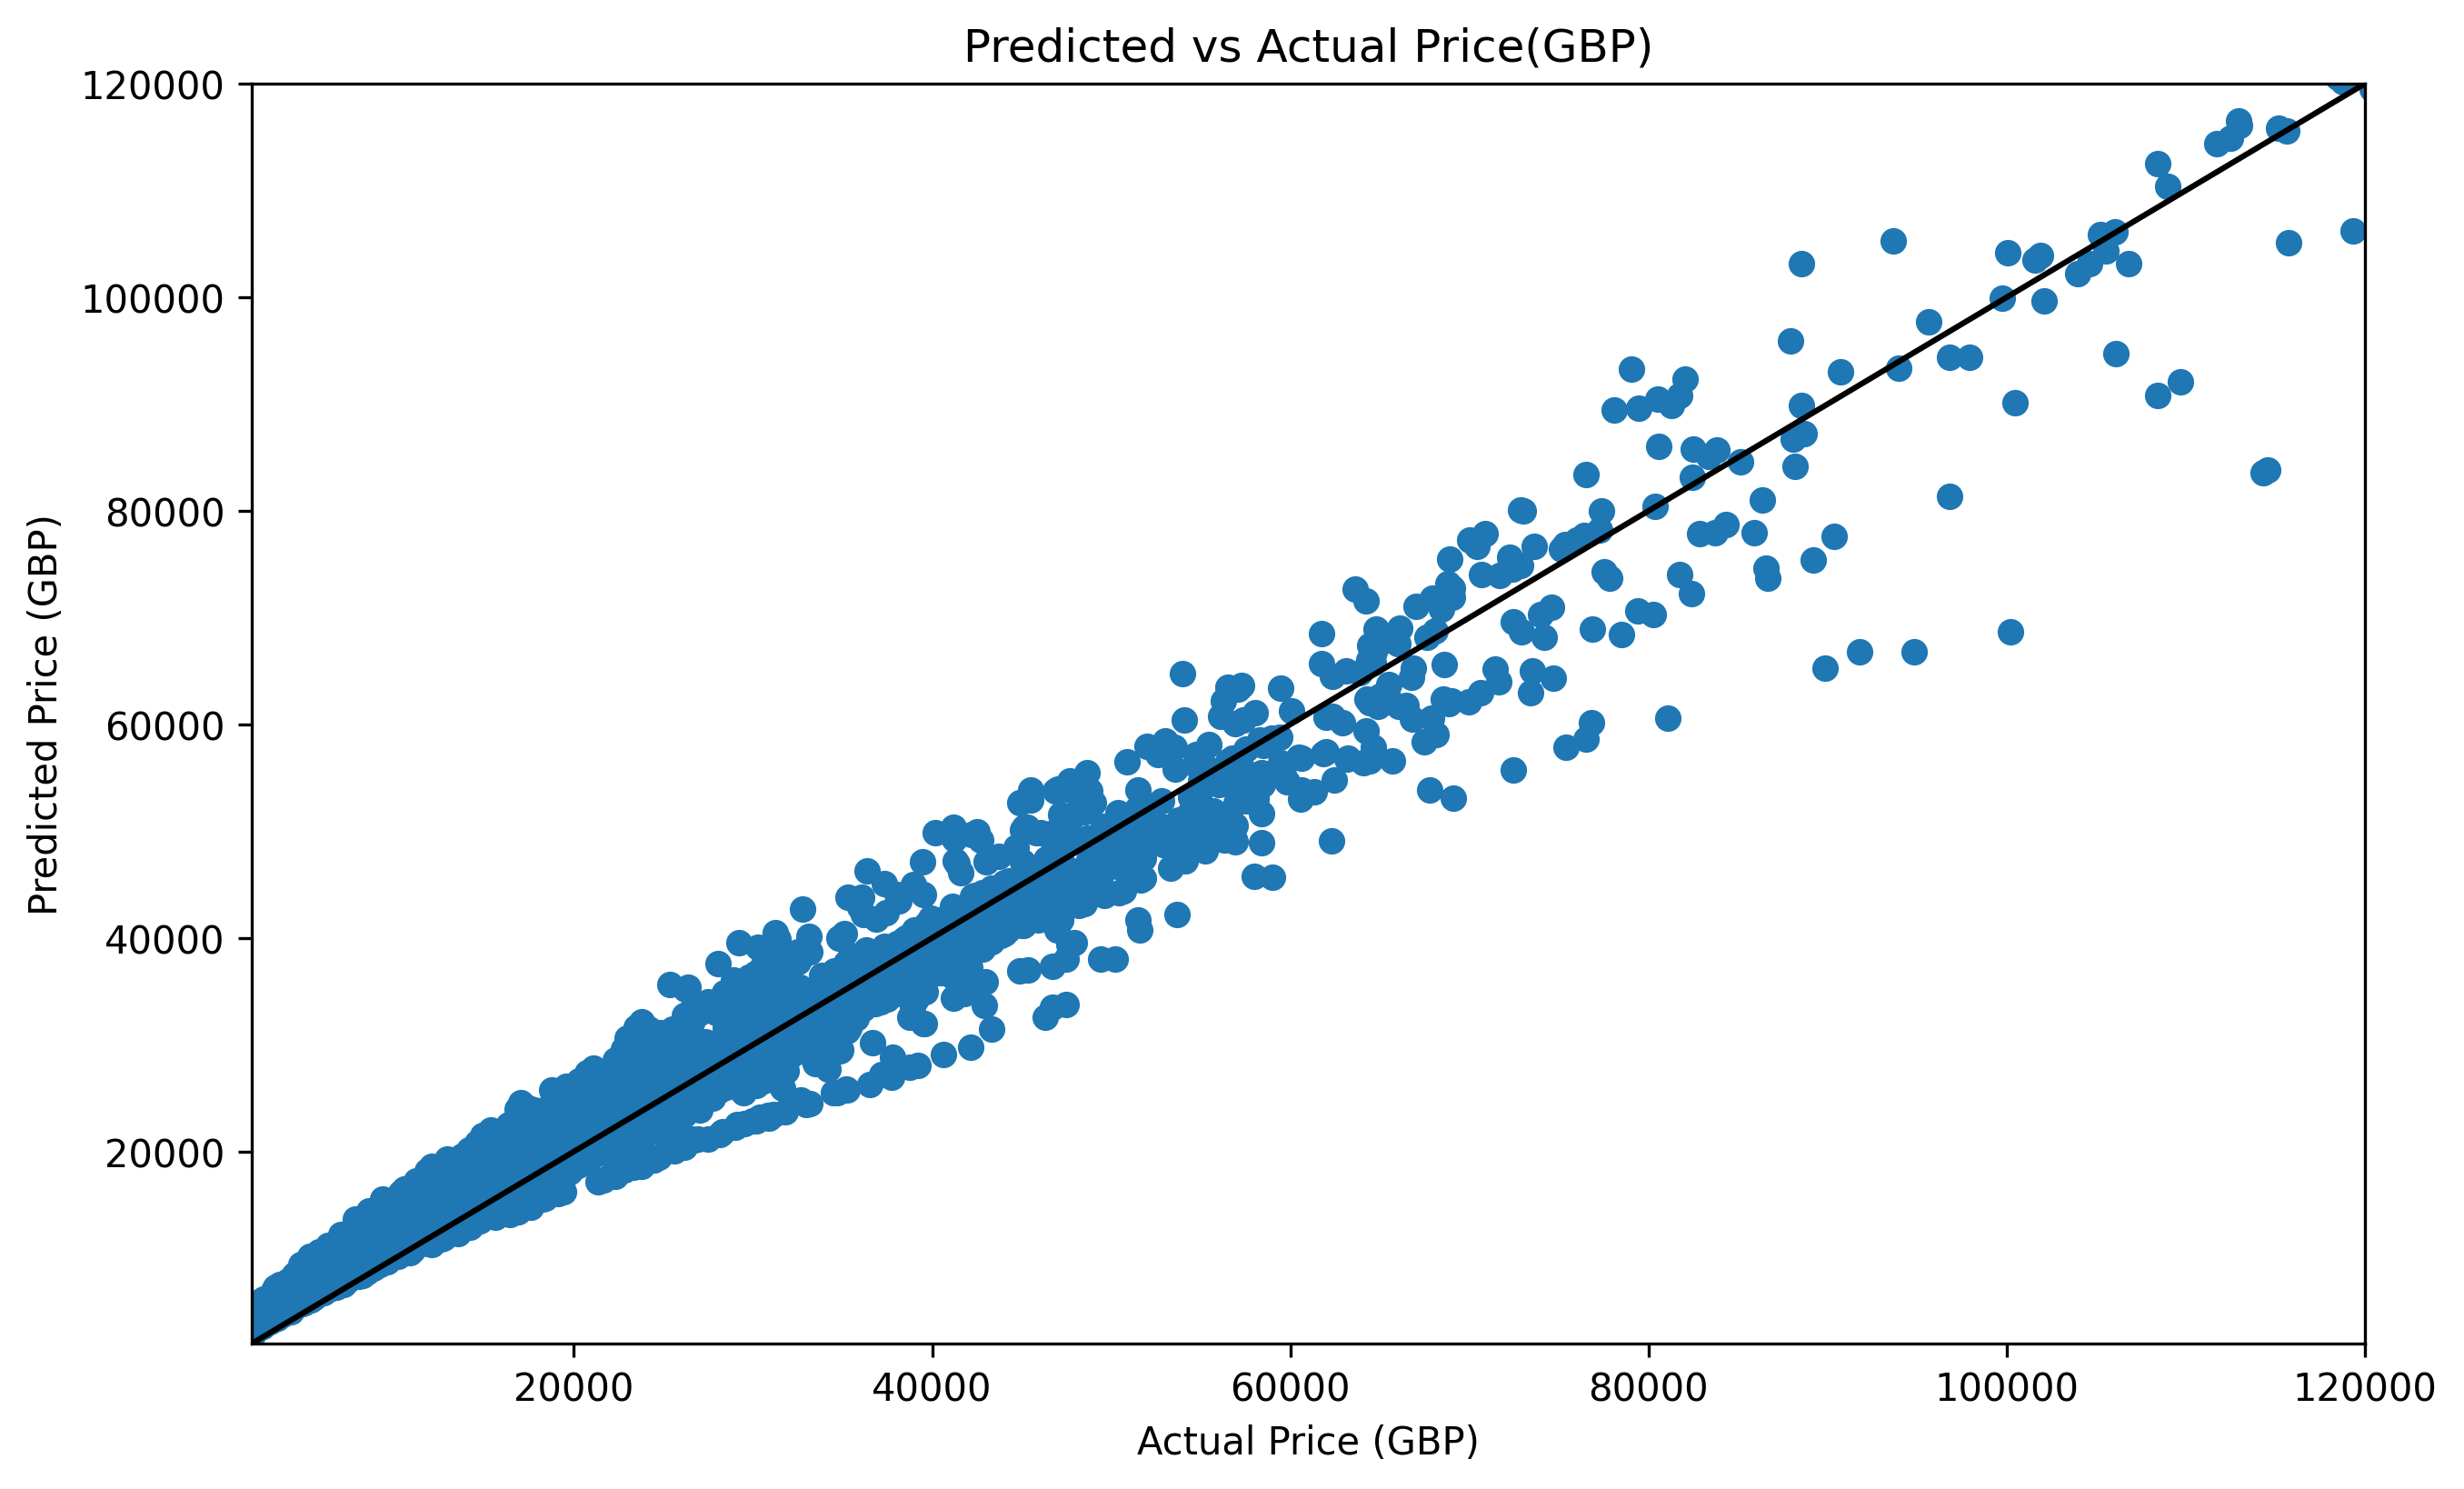

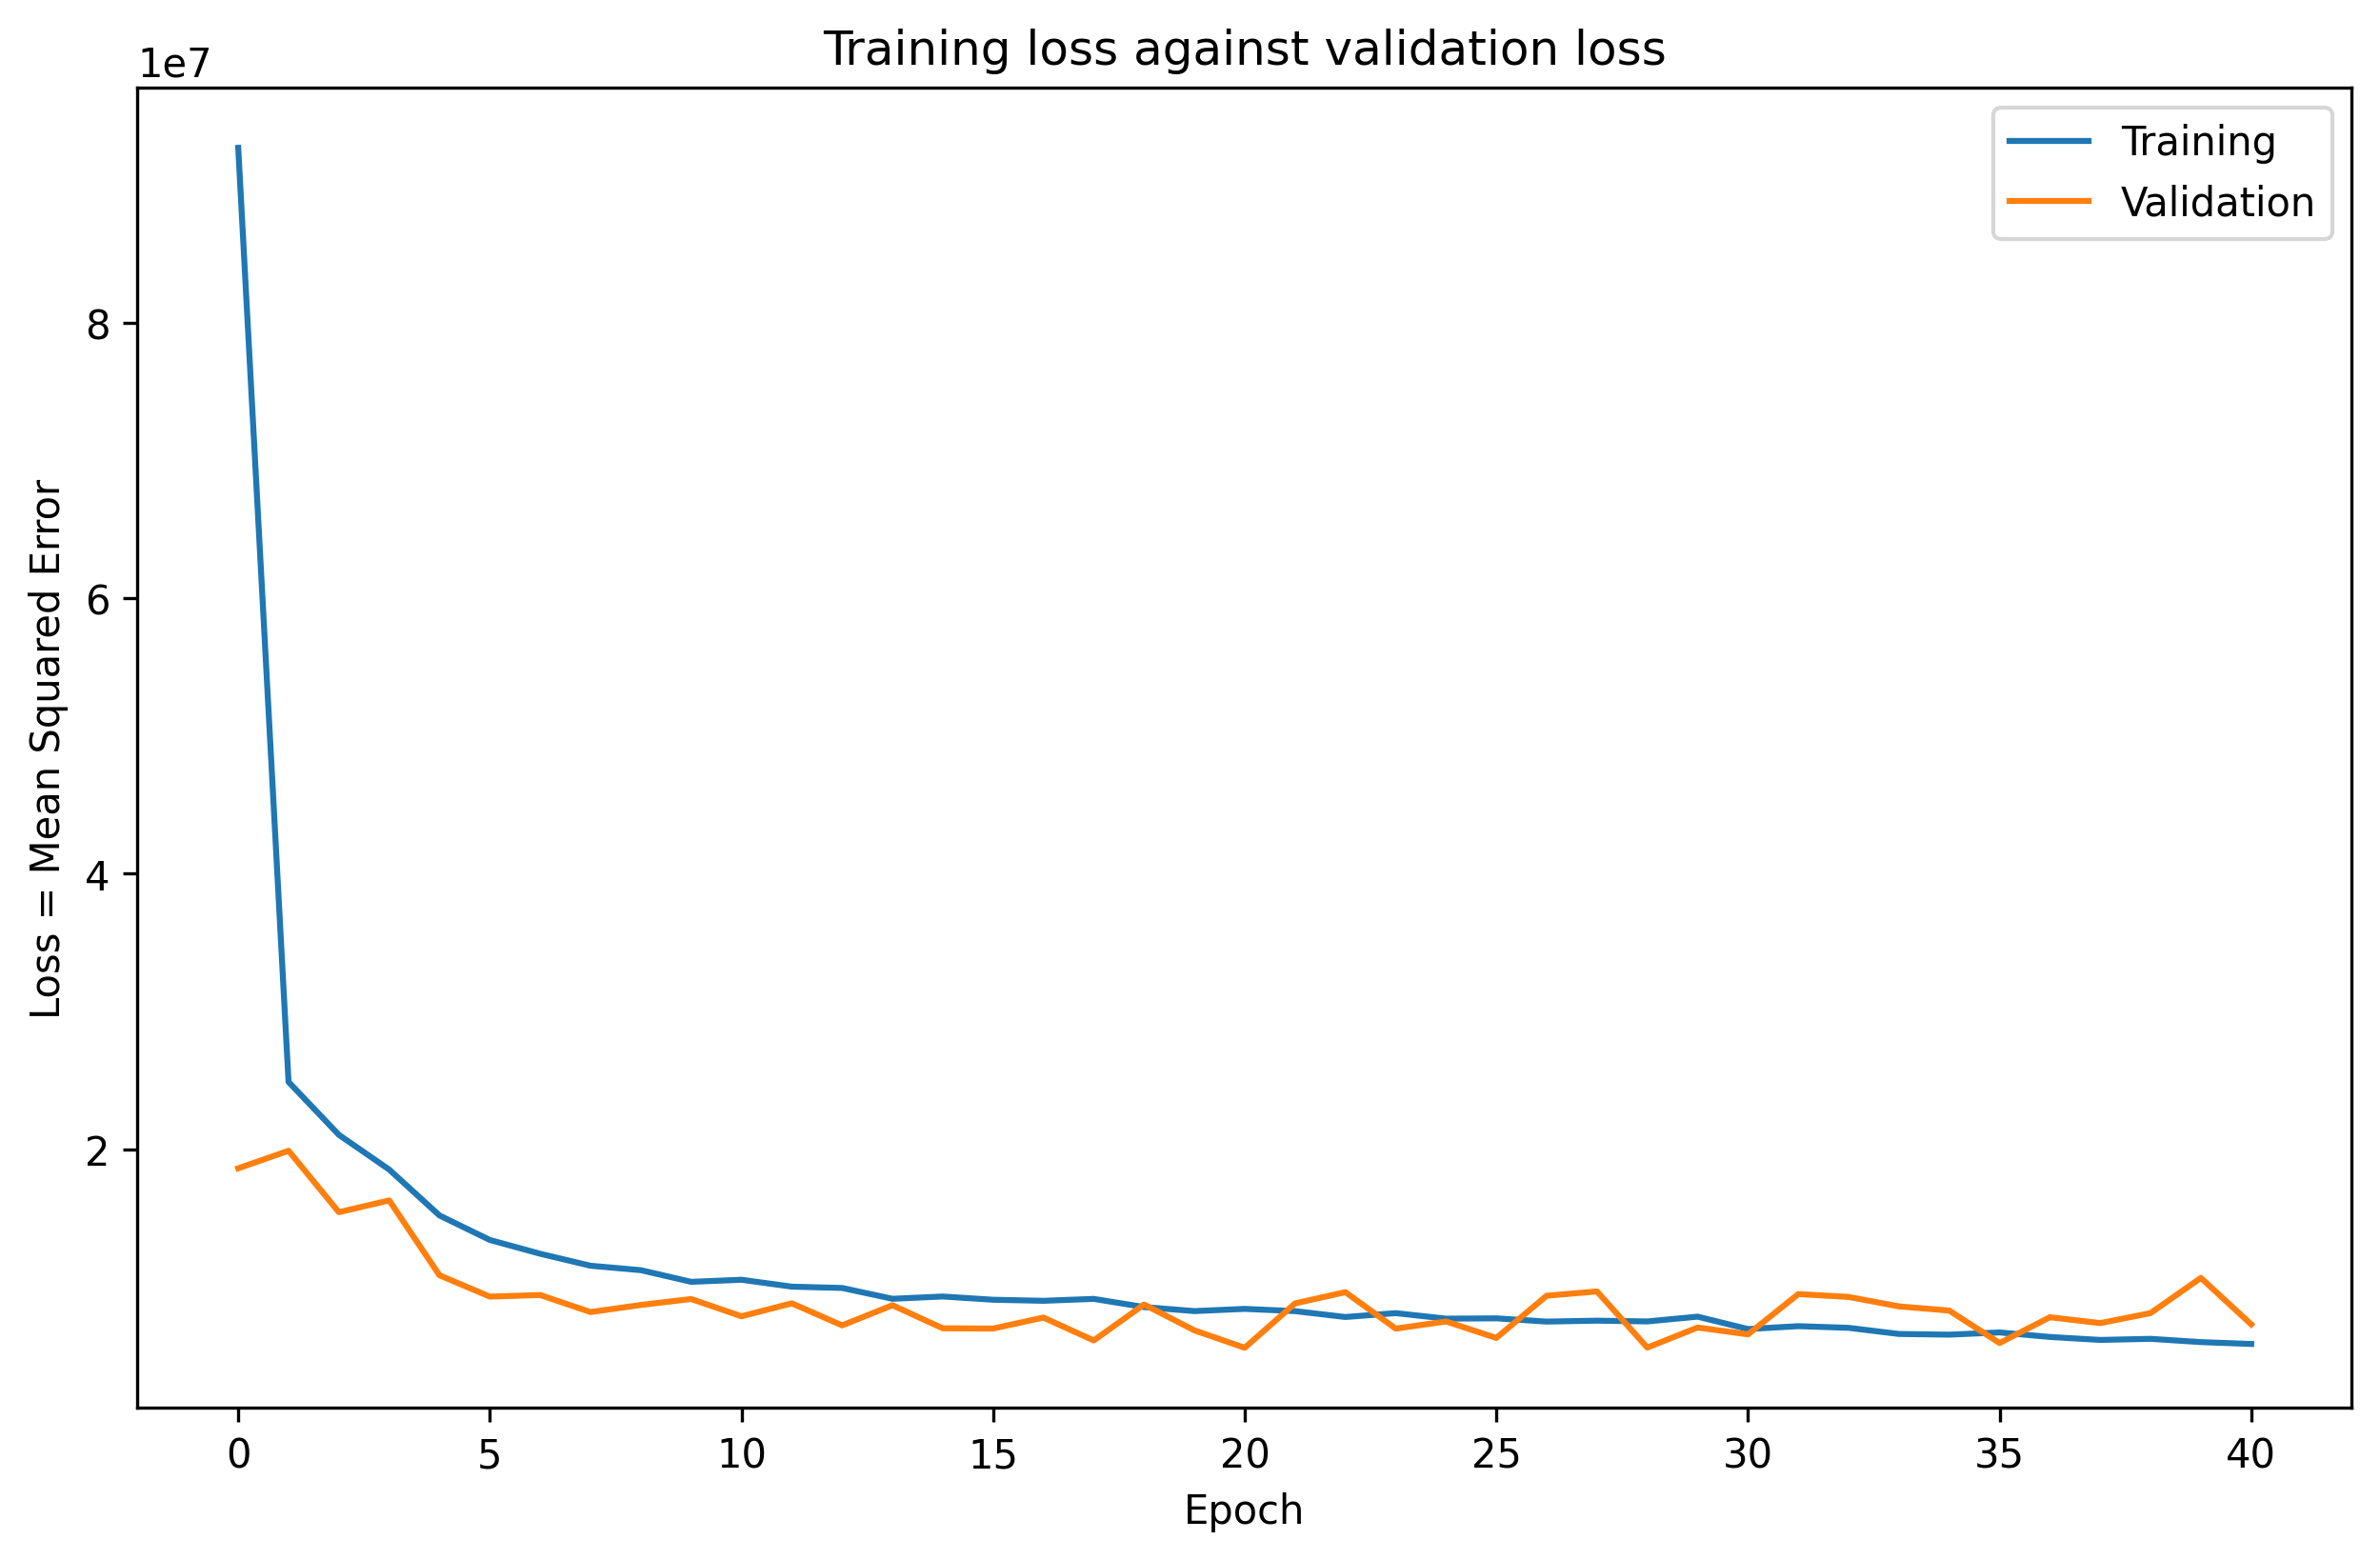

Mean absolute error:  2213.218599530029
Mean squared error:  7786332.959080356
Root mean squared error:  2790.4001431838333
R2:  0.9713078700467755


In [47]:
# Predicting the model outputs for the testing set

y6_pred = model_2.predict(x6_test_scaled)

# Plotting the predicted vs actual values

plt.figure(figsize = (10, 6), dpi = 300)
plt.scatter(y6_test, y6_pred)

# Adding a diagonal line showing the one-to-one relation

plt.plot([2000, 120000], [2000, 120000], 'k-')

# Labelling both axes.

plt.xlabel("Actual Price (GBP)")
plt.ylabel("Predicted Price (GBP)")

# Limiting the range of values on both axes

plt.xlim(2000, 120000)
plt.ylim(2000, 120000)

# Showing the plot
plt.title("Predicted vs Actual Price(GBP)")
plt.show()

# Creating a pandas dataframe containing the history of the fitting

history_df = pd.DataFrame(history.history)

plt.figure(figsize = (10, 6), dpi = 300)

# Plotting the training and validation loss versus epoch

plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Adding a legend to the plot

plt.legend()

# Labelling both axes

plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")

# Showing the plot
plt.title("Training loss against validation loss")
plt.show()


# Calculating the mean absolute error

mean_abs6 = mean_absolute_error(y6_test, y6_pred)

# Calculating the mean squared error

mean_squared6 = mean_squared_error(y6_test, y6_pred)

# Calculating the root mean squared error

rms_error6 = np.sqrt(mean_squared6)

# Calculating the R2 score

R2_6 = r2_score(y6_test, y6_pred)

# Printing the results of these metrics

print("Mean absolute error: ", mean_abs6)
print("Mean squared error: ", mean_squared6)
print("Root mean squared error: ", rms_error6)
print("R2: ", R2_6)

## Varying the learning rate of the Adam Optimizer

## Using a learning rate of 0.01

In [48]:
from keras.optimizers import Adam

# Creating an instance of the Adam class. We will set the learning_rate to 0.01 here

adam_optimizer = Adam(learning_rate = 0.01)

# Creating an instance of the Sequential class.

model_3 = Sequential()

# Adding the first hidden layer, with input_dim = 6, 64 units, and the ReLU activation function

model_3.add(Dense(units = 64, input_dim = (6), activation = "relu"))

# Adding a dropout layer with a 20% dropout rate

model_3.add(Dropout(0.2))

# Adding other hidden layers with 64 units and the ReLU activation function

model_3.add(Dense(units = 64, activation = "relu"))
model_3.add(Dense(units = 64, activation = "relu"))
model_3.add(Dense(units = 64, activation = "relu"))
model_3.add(Dense(units = 64, activation = "relu"))

# Output layer

model_3.add(Dense(units = 1, activation = "linear"))

# Printing a summary of the model

model_3.summary()

# Compiling the model using the Adam optimizer

model_3.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')

# Defining the early stopping criterion, with a patience of 20

early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Training the model

history = model_3.fit(x = x6_train_scaled, y = y6_train, 
                    batch_size = None, epochs= 200,
                    verbose = "auto", 
                    validation_split = 0.1, 
                    callbacks =[early_stopping])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                448       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 1)                

313/313 [==============================] - 0s 832us/step


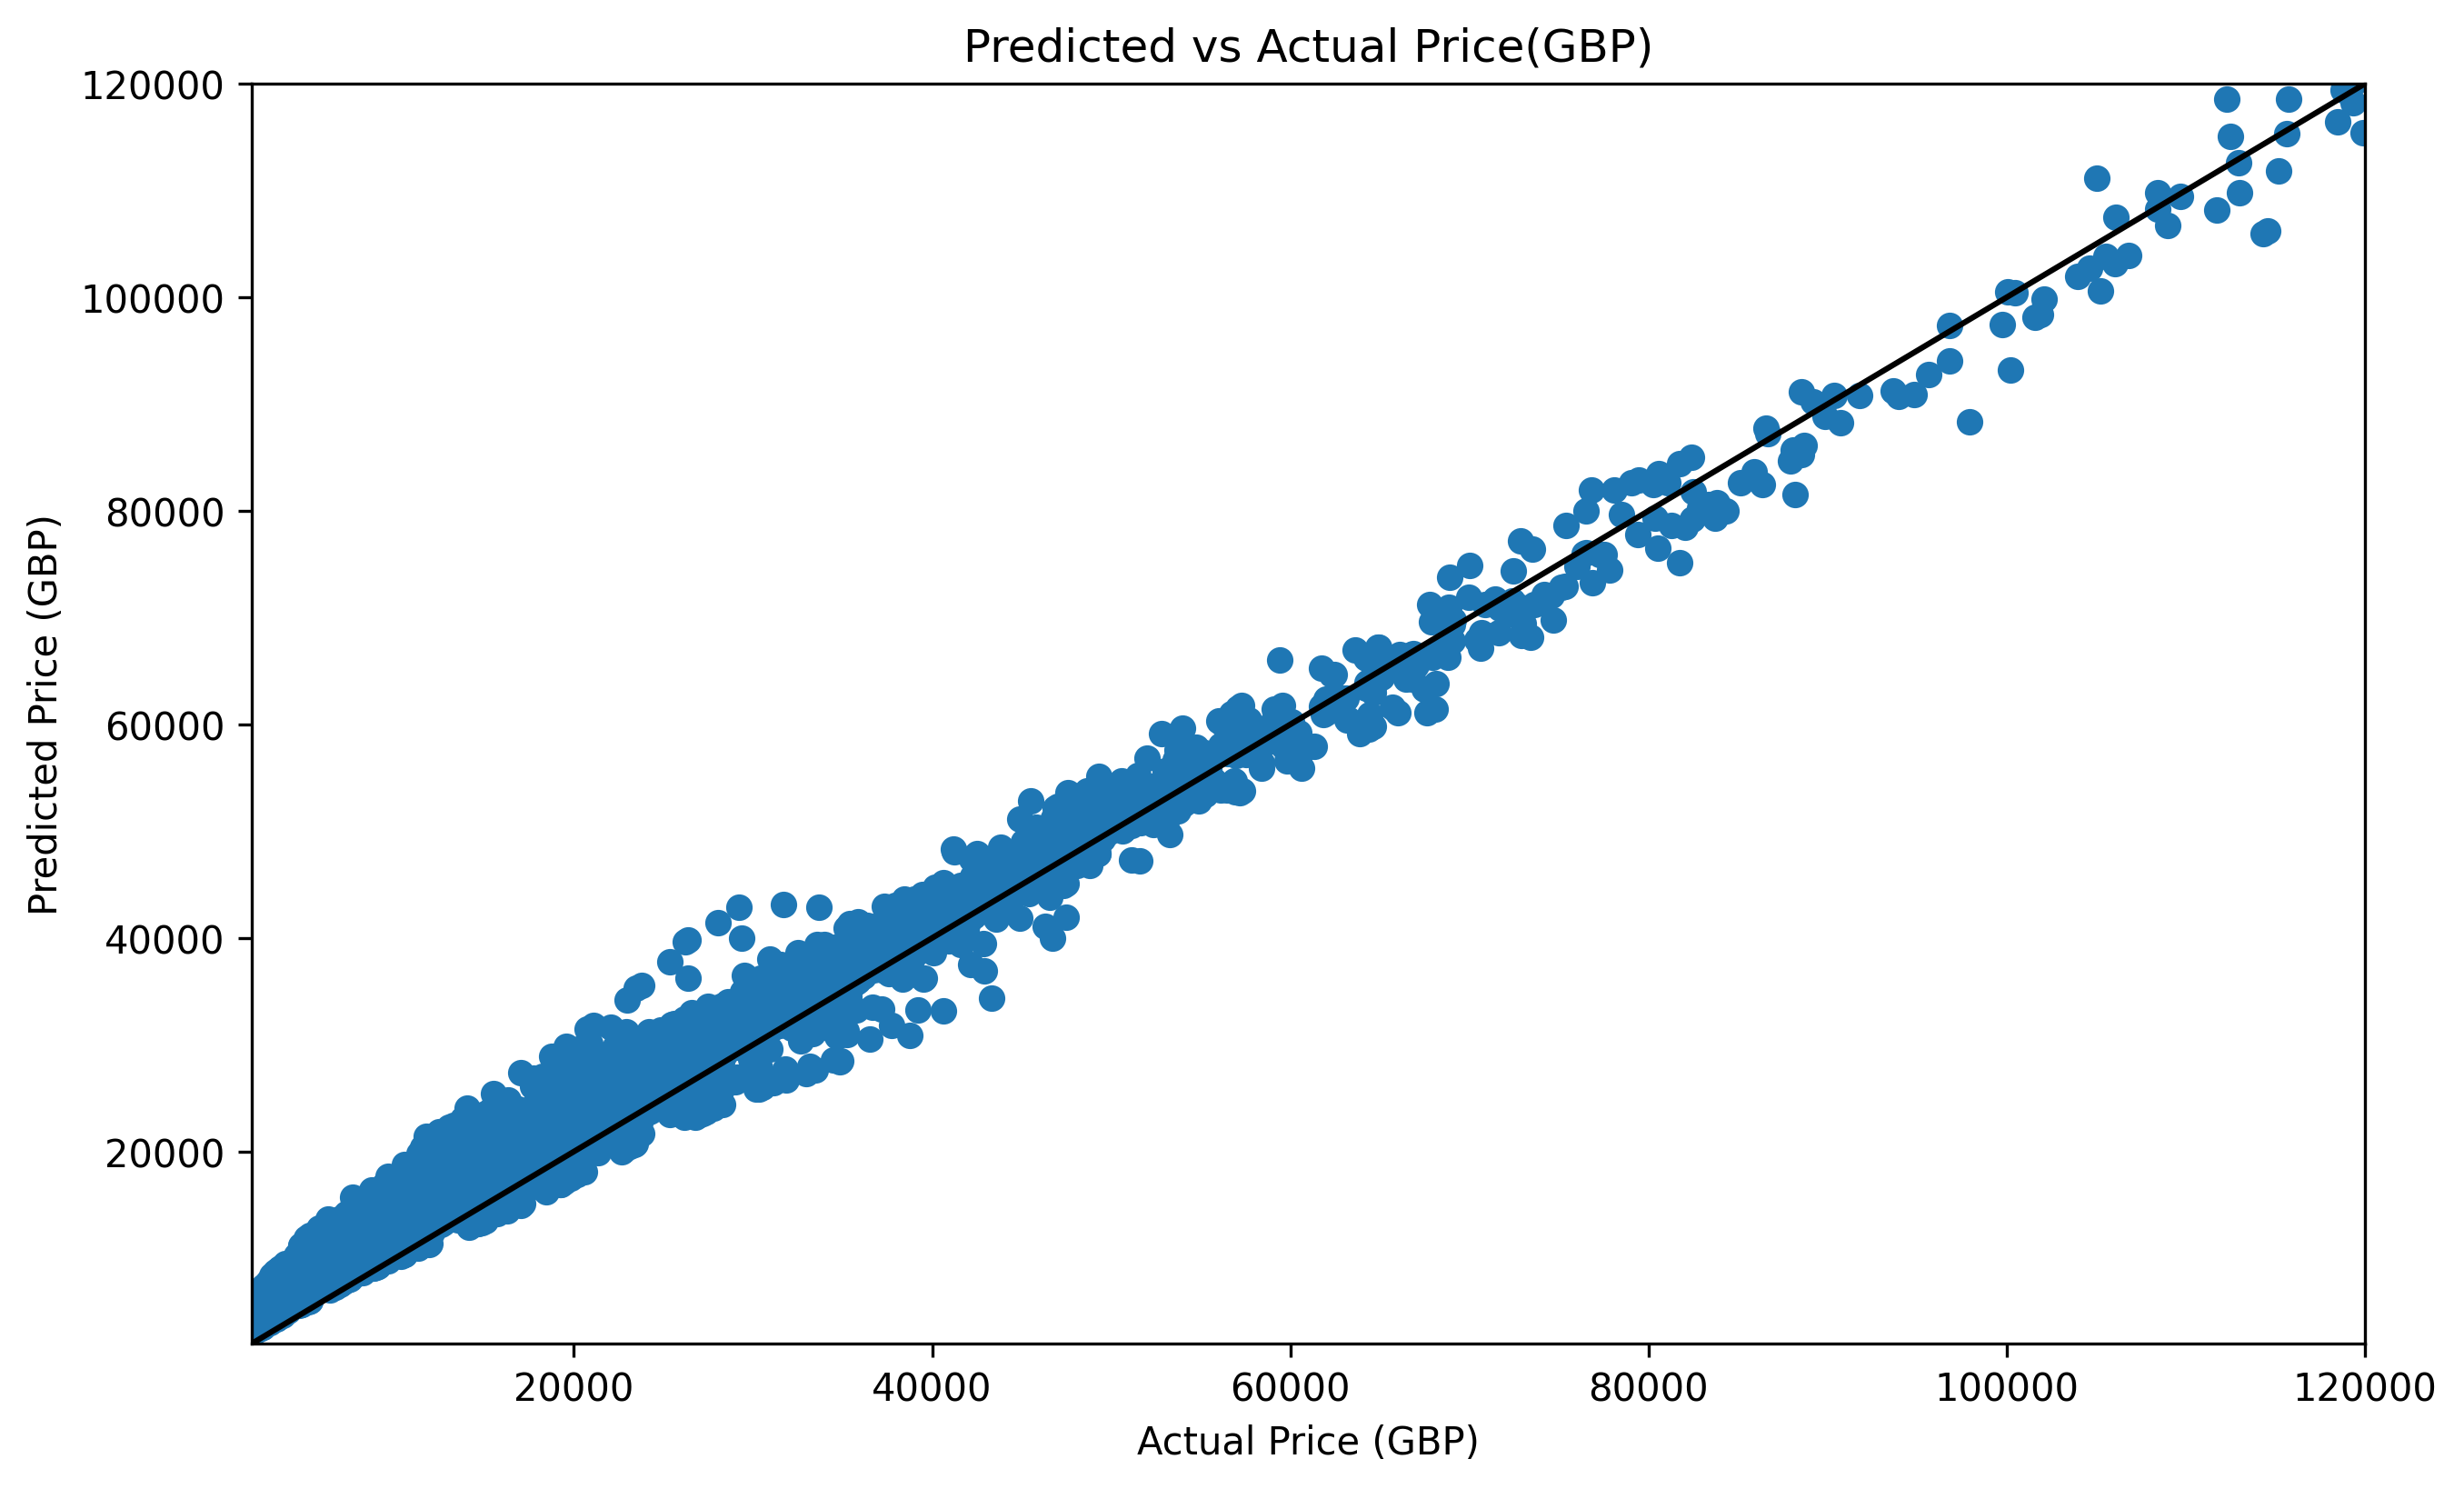

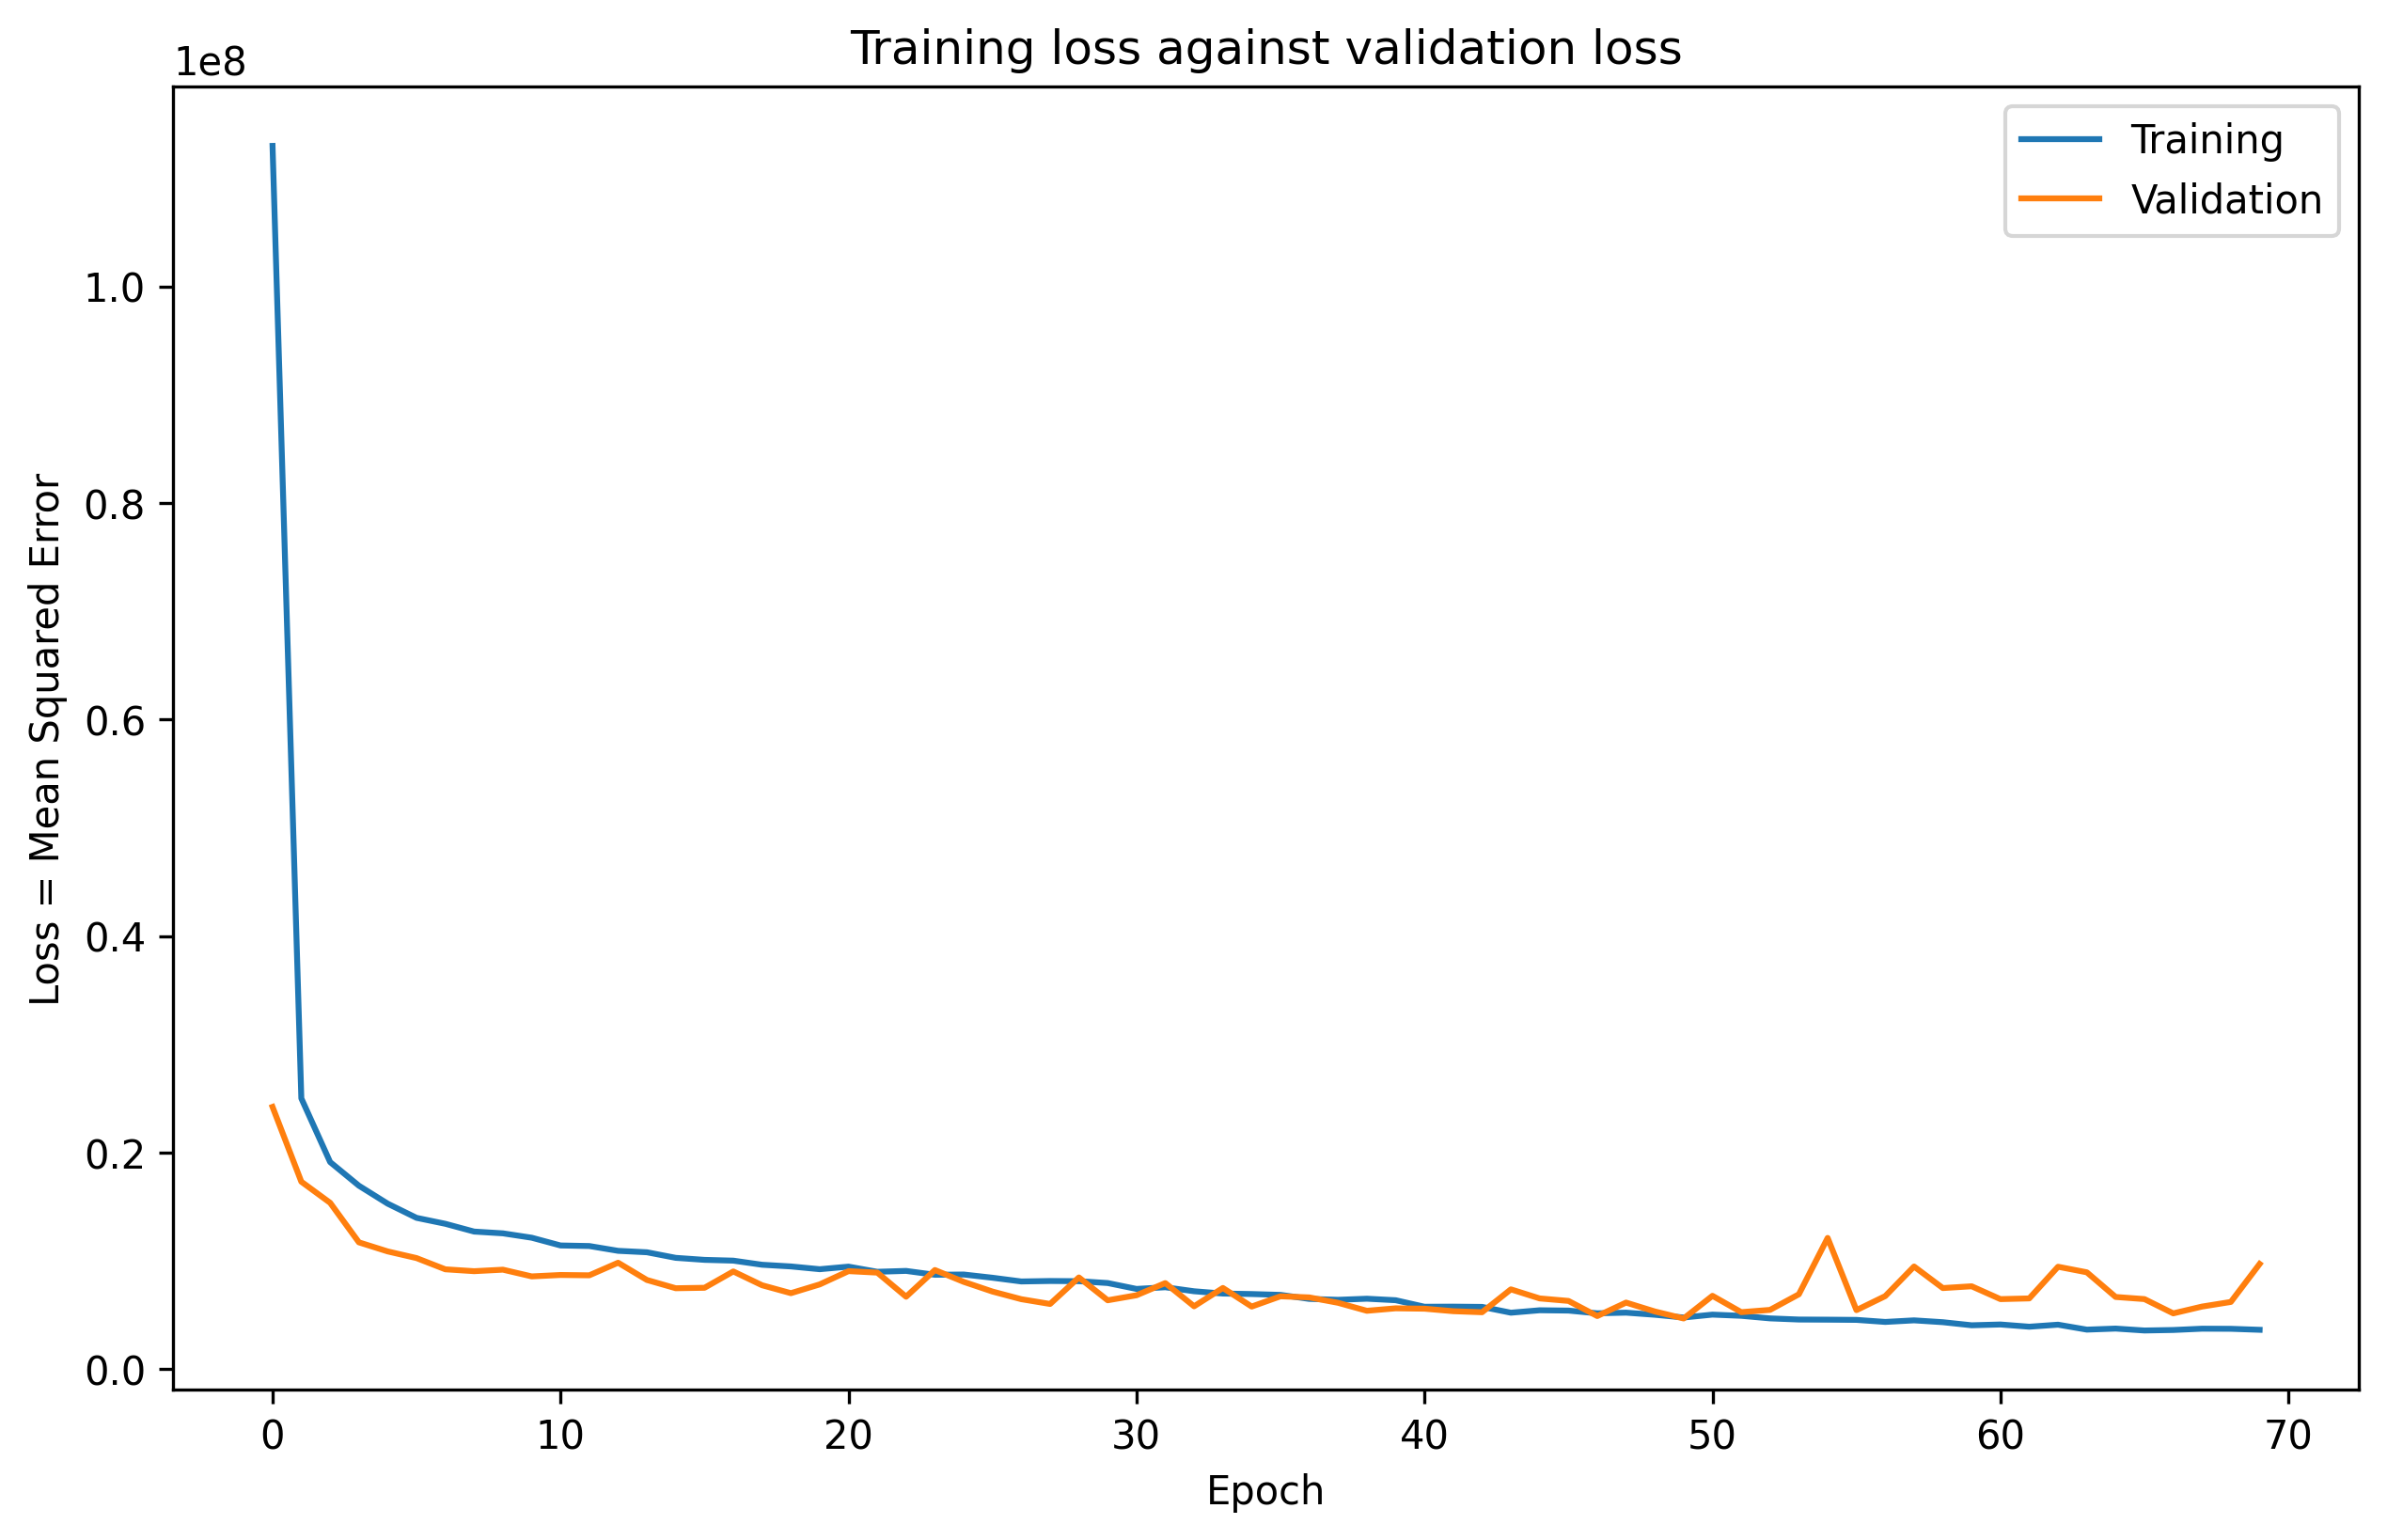

Mean absolute error:  2786.0143764526365
Mean squared error:  9658839.893598992
Root mean squared error:  3107.8674189223375
R2:  0.9644078039199003


In [49]:
# Predicting the model outputs for the testing set

y6_pred = model_3.predict(x6_test_scaled)

# Plotting the predicted vs actual values

plt.figure(figsize = (10, 6), dpi = 300)
plt.scatter(y6_test, y6_pred)

# Adding a diagonal line showing the one-to-one relation

plt.plot([2000, 120000], [2000, 120000], 'k-')

# Labelling both axes.

plt.xlabel("Actual Price (GBP)")
plt.ylabel("Predicted Price (GBP)")

# Limiting the range of values on both axes

plt.xlim(2000, 120000)
plt.ylim(2000, 120000)

# Showing the plot
plt.title("Predicted vs Actual Price(GBP)")
plt.show()

# Creating a pandas dataframe containing the history of the fitting

history_df = pd.DataFrame(history.history)

plt.figure(figsize = (10, 6), dpi = 300)

# Plotting the training and validation loss versus epoch

plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Adding a legend to the plot

plt.legend()

# Labelling both axes

plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")

# Showing the plot
plt.title("Training loss against validation loss")
plt.show()


# Calculating the mean absolute error

mean_abs6 = mean_absolute_error(y6_test, y6_pred)

# Calculating the mean squared error

mean_squared6 = mean_squared_error(y6_test, y6_pred)

# Calculating the root mean squared error

rms_error6 = np.sqrt(mean_squared6)

# Calculating the R2 score

R2_6 = r2_score(y6_test, y6_pred)

# Printing the results of these metrics

print("Mean absolute error: ", mean_abs6)
print("Mean squared error: ", mean_squared6)
print("Root mean squared error: ", rms_error6)
print("R2: ", R2_6)

## Using a learning rate of 0.0001

In [50]:
# Creating an instance of the Adam class. We will set the learning_rate to 0.0001 here

adam_optimizer = Adam(learning_rate = 0.0001)

# Creating an instance of the Sequential class.

model_4 = Sequential()

# Adding the first hidden layer, with input_dim = 6, 64 units, and the ReLU activation function

model_4.add(Dense(units = 64, input_dim = (6), activation = "relu"))

# Adding a dropout layer with a 20% dropout rate

model_4.add(Dropout(0.2))

# Adding other hidden layers with 64 units and the ReLU activation function

model_4.add(Dense(units = 64, activation = "relu"))
model_4.add(Dense(units = 64, activation = "relu"))
model_4.add(Dense(units = 64, activation = "relu"))
model_4.add(Dense(units = 64, activation = "relu"))

# Output layer

model_4.add(Dense(units = 1, activation = "linear"))

# Printing a summary of the model

model_4.summary()

# Compiling the model using the Adam optimizer

model_4.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')

# Defining the early stopping criterion, with a patience of 20

early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Training the model

history = model_4.fit(x = x6_train_scaled, y = y6_train, 
                    batch_size = None, epochs= 200,
                    verbose = "auto", 
                    validation_split = 0.1, 
                    callbacks =[early_stopping])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                448       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dense_24 (Dense)            (None, 1)                

313/313 [==============================] - 0s 877us/step


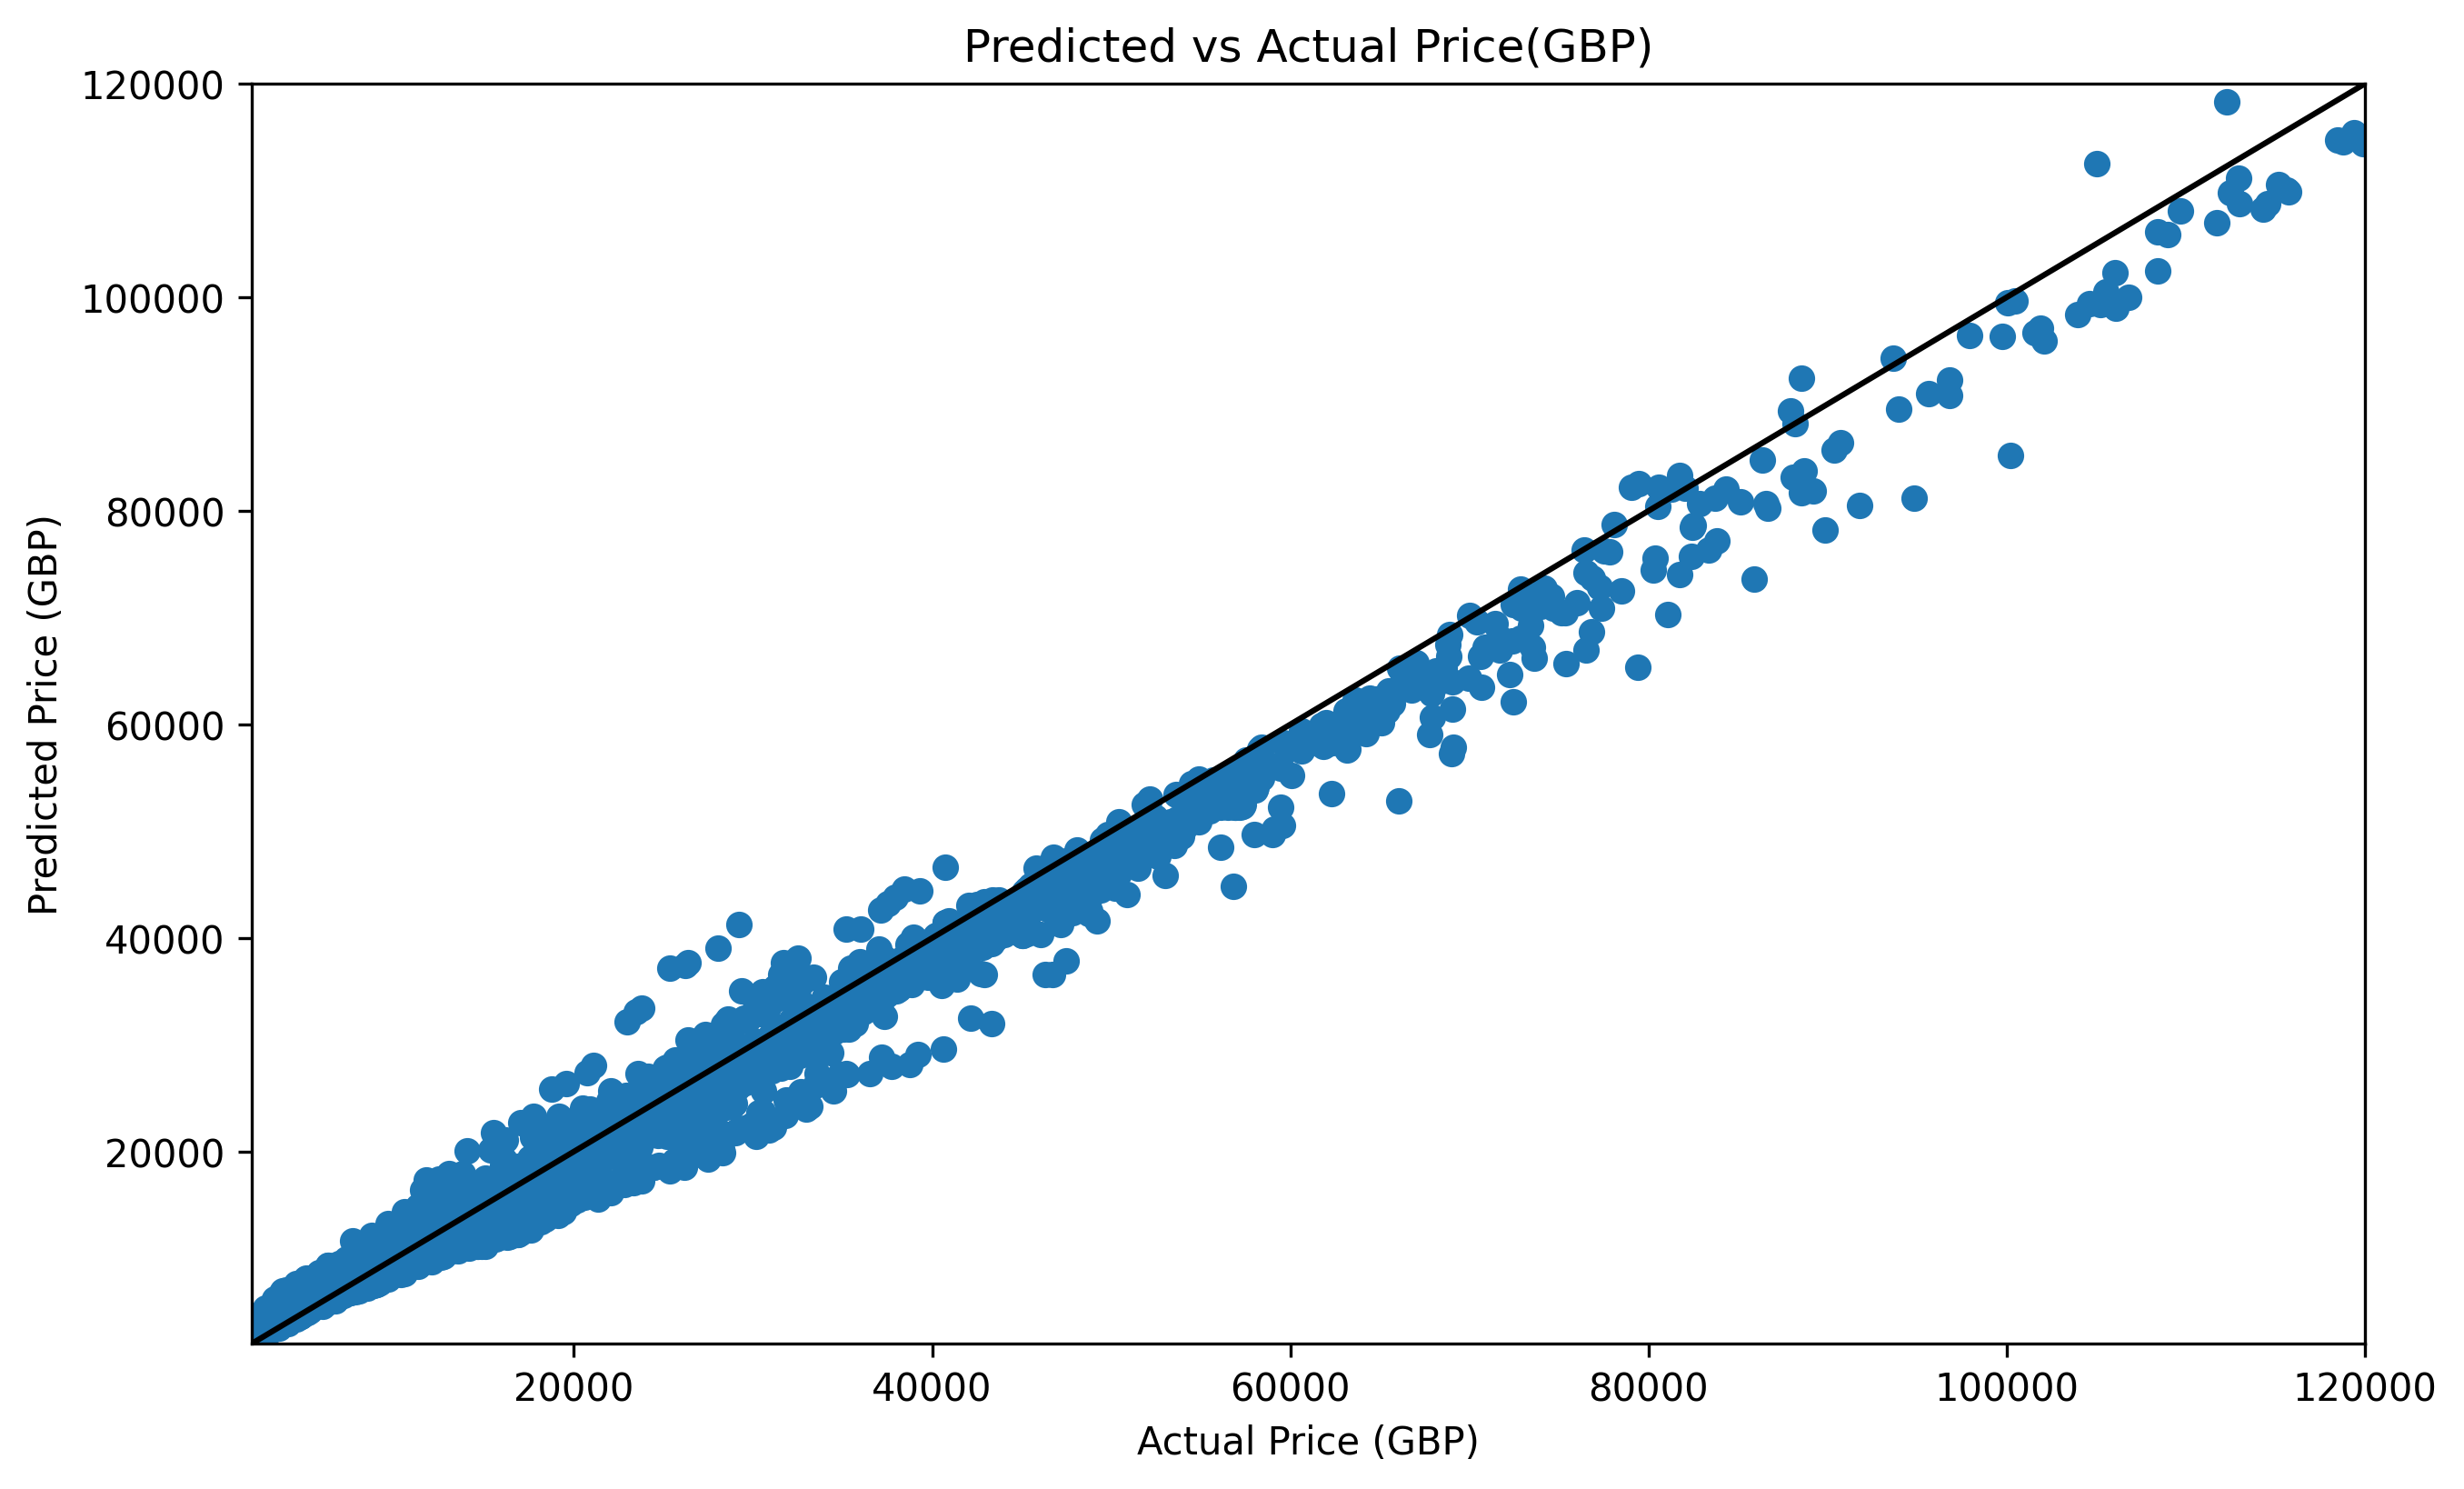

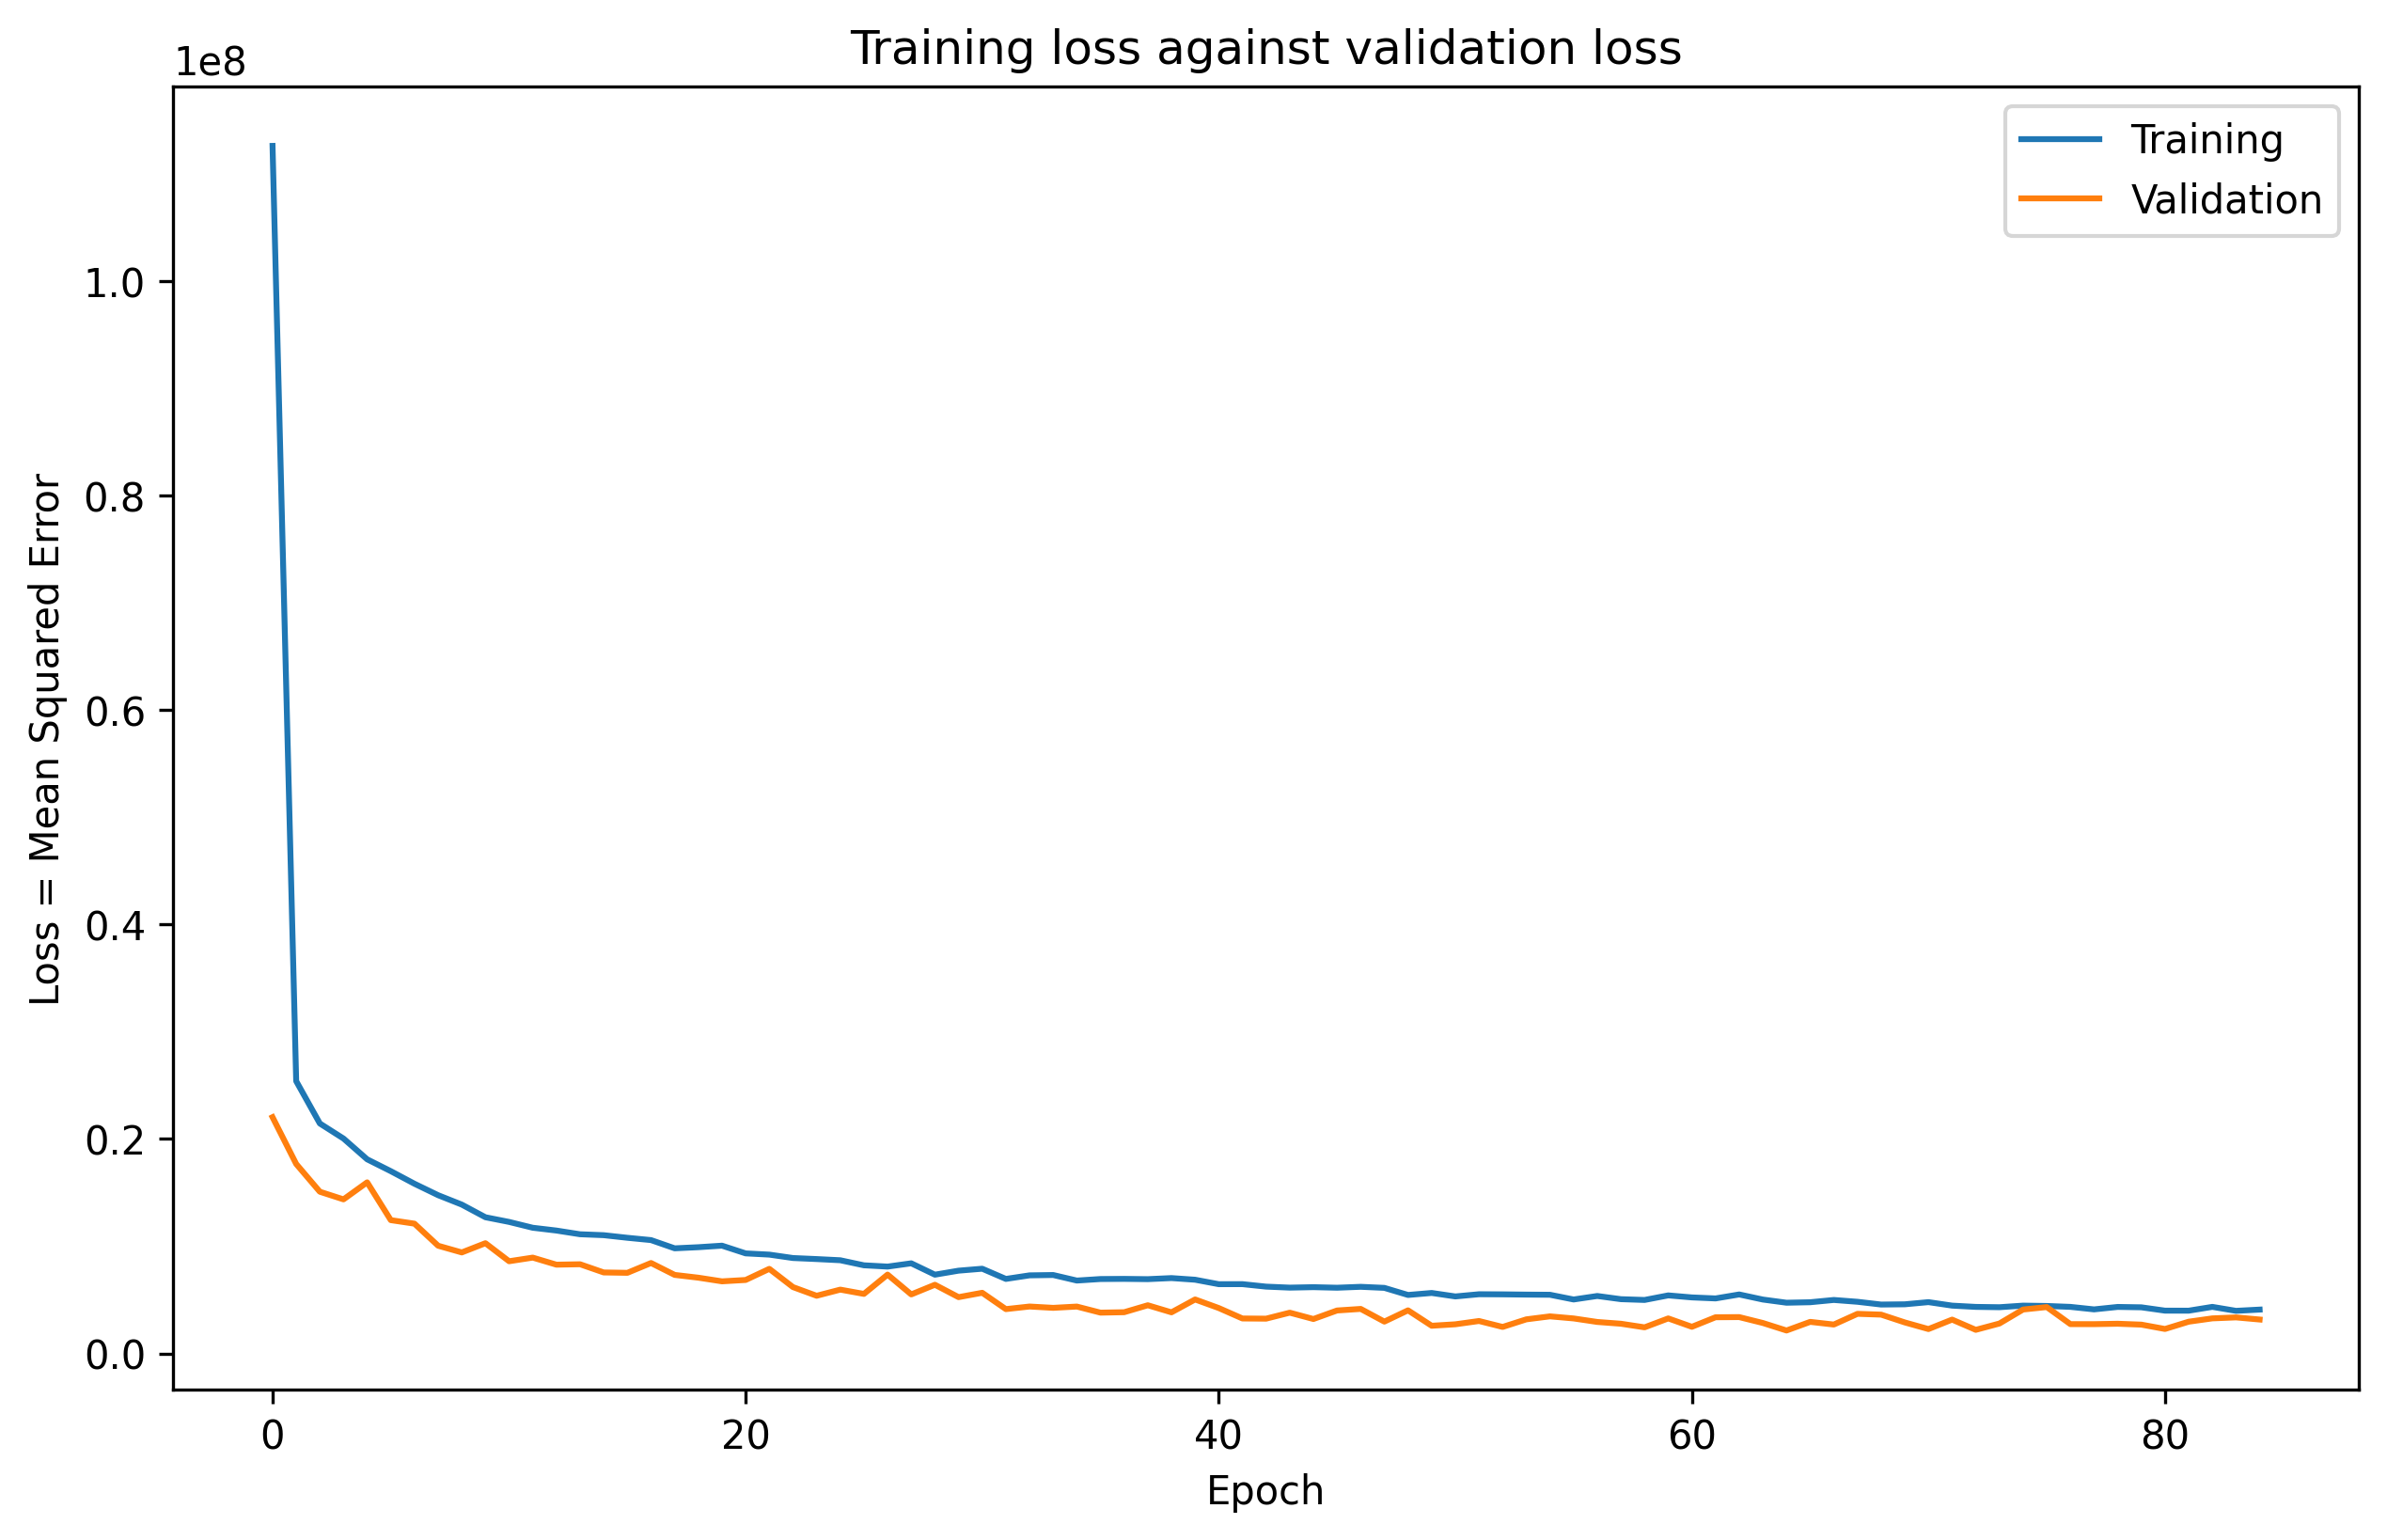

Mean absolute error:  1270.0633372253417
Mean squared error:  2991697.537309056
Root mean squared error:  1729.652432516156
R2:  0.9889757893770637


In [51]:
# Predicting the model outputs for the testing set

y6_pred = model_4.predict(x6_test_scaled)

# Plotting the predicted vs actual values

plt.figure(figsize = (10, 6), dpi = 300)
plt.scatter(y6_test, y6_pred)

# Adding a diagonal line showing the one-to-one relation

plt.plot([2000, 120000], [2000, 120000], 'k-')

# Labelling both axes.

plt.xlabel("Actual Price (GBP)")
plt.ylabel("Predicted Price (GBP)")

# Limiting the range of values on both axes

plt.xlim(2000, 120000)
plt.ylim(2000, 120000)

# Showing the plot
plt.title("Predicted vs Actual Price(GBP)")
plt.show()

# Creating a pandas dataframe containing the history of the fitting

history_df = pd.DataFrame(history.history)

plt.figure(figsize = (10, 6), dpi = 300)

# Plotting the training and validation loss versus epoch

plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Adding a legend to the plot

plt.legend()

# Labelling both axes

plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")

# Showing the plot
plt.title("Training loss against validation loss")
plt.show()


# Calculating the mean absolute error

mean_abs6 = mean_absolute_error(y6_test, y6_pred)

# Calculating the mean squared error

mean_squared6 = mean_squared_error(y6_test, y6_pred)

# Calculating the root mean squared error

rms_error6 = np.sqrt(mean_squared6)

# Calculating the R2 score

R2_6 = r2_score(y6_test, y6_pred)

# Printing the results of these metrics

print("Mean absolute error: ", mean_abs6)
print("Mean squared error: ", mean_squared6)
print("Root mean squared error: ", rms_error6)
print("R2: ", R2_6)

## Using a drop out rate of 10%

In [52]:
# Creating an instance of the Sequential class.

model_5 = Sequential()

# Adding the first hidden layer, with input_dim = 6, 64 units, and the ReLU activation function

model_5.add(Dense(units = 64, input_dim = (6), activation = "relu"))

# Adding a dropout layer with a 10% dropout rate

model_5.add(Dropout(0.1))

# Adding other hidden layers with 64 units and the ReLU activation function

model_5.add(Dense(units = 64, activation = "relu"))
model_5.add(Dense(units = 64, activation = "relu"))
model_5.add(Dense(units = 64, activation = "relu"))
model_5.add(Dense(units = 64, activation = "relu"))

# Output layer

model_5.add(Dense(units = 1, activation = "linear"))

# Printing a summary of the model

model_5.summary()

# Compiling the model using the Adam optimizer

model_5.compile(optimizer="adam", loss='mean_squared_error',metrics='mean_squared_error')

# Defining the early stopping criterion, with a patience of 20

early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Training the model

history = model_5.fit(x = x6_train_scaled, y = y6_train, 
                    batch_size = None, epochs= 200,
                    verbose = "auto", 
                    validation_split = 0.1, 
                    callbacks =[early_stopping])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                448       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 64)                4160      
                                                                 
 dense_30 (Dense)            (None, 1)                

313/313 [==============================] - 0s 883us/step


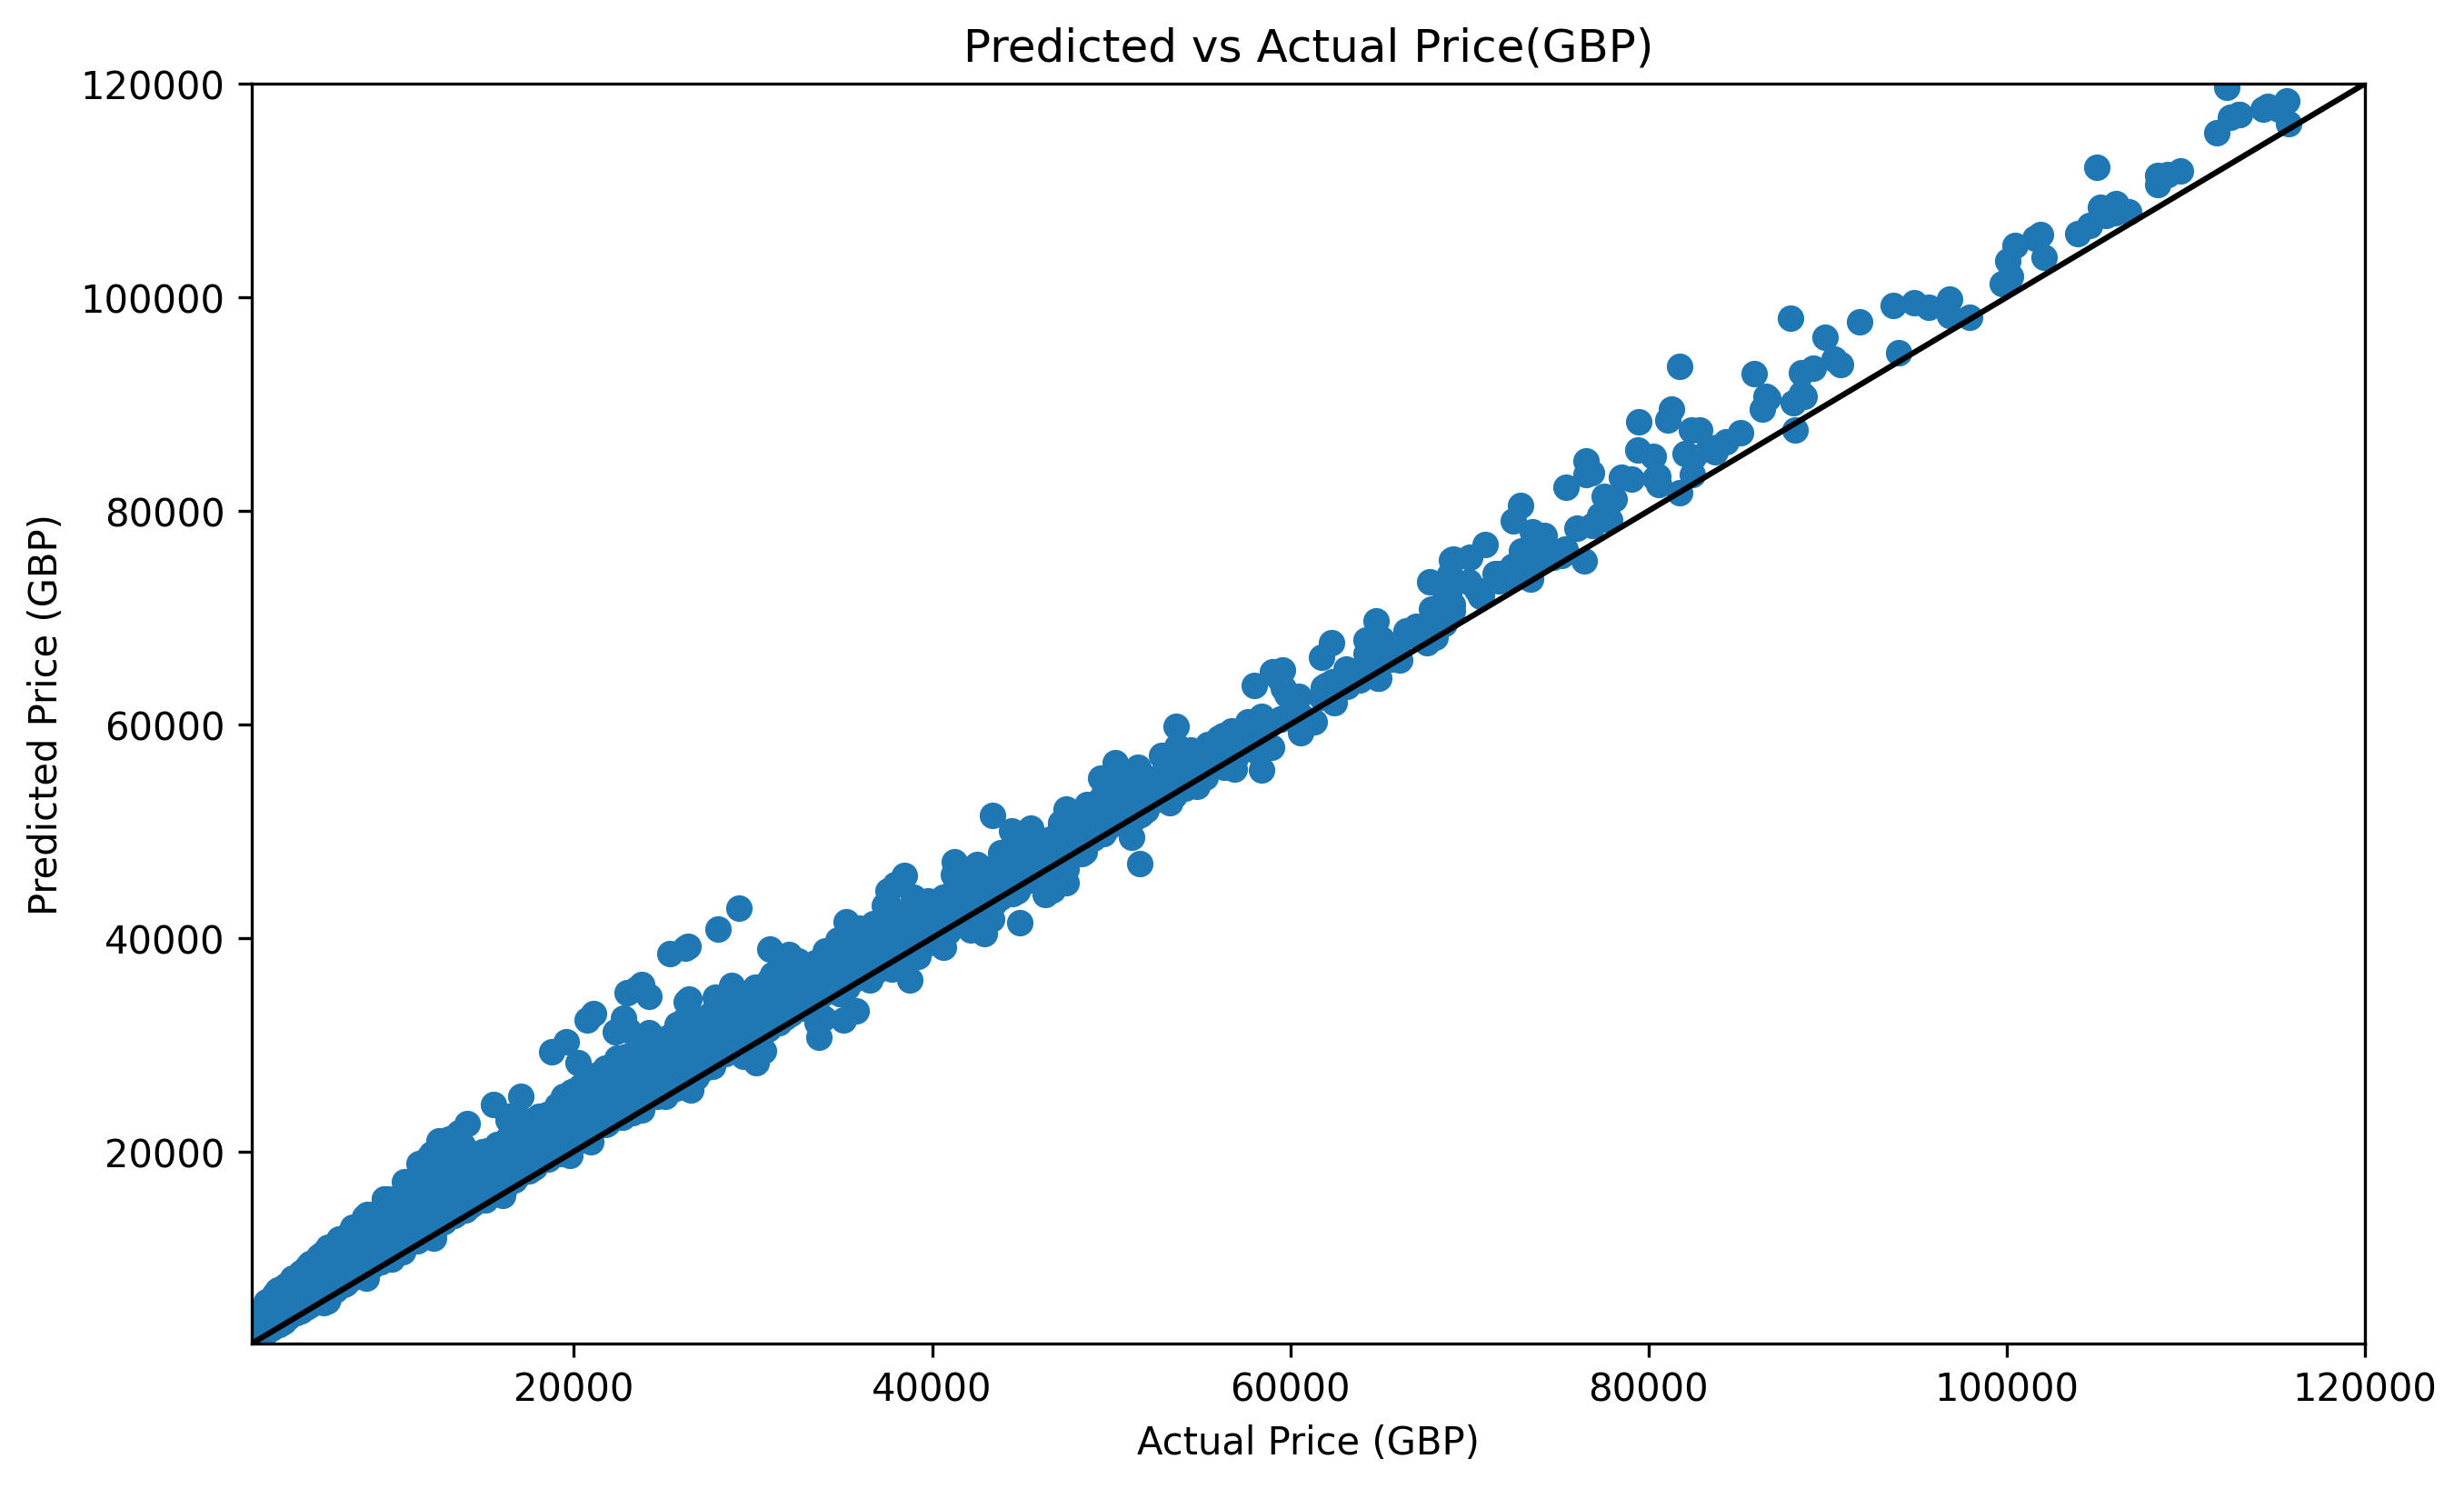

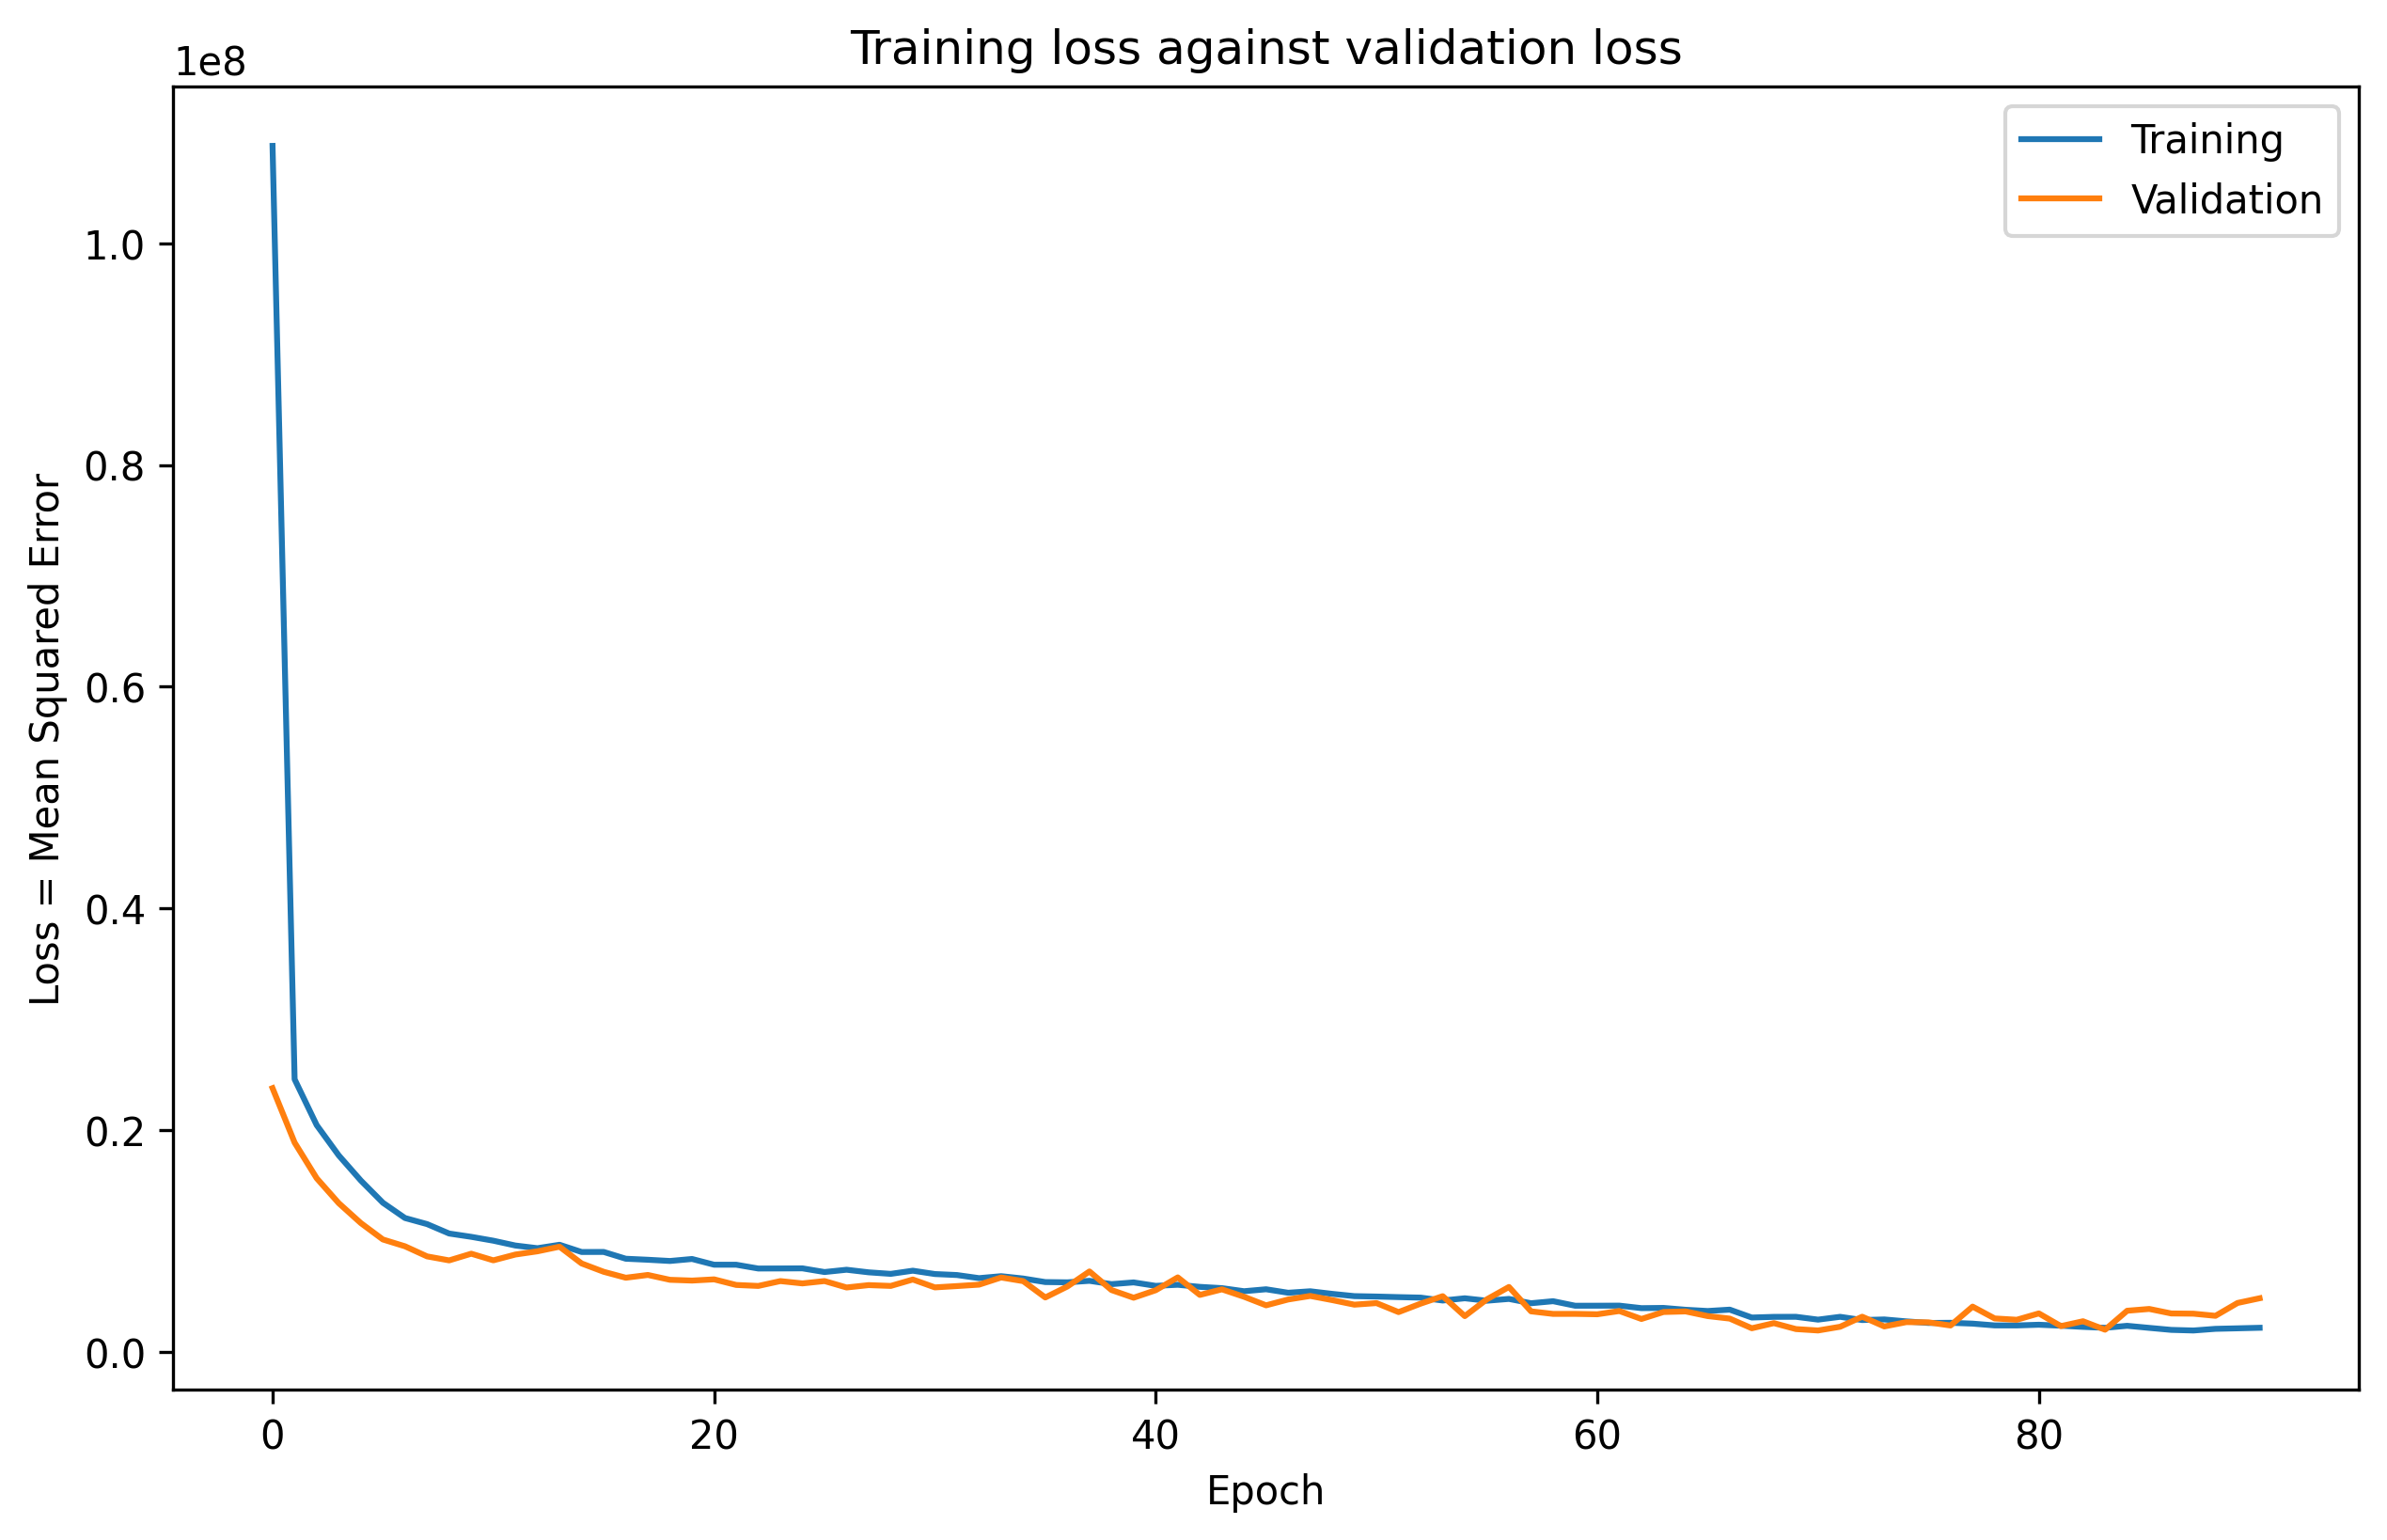

Mean absolute error:  1857.1585206054688
Mean squared error:  4881970.275349807
Root mean squared error:  2209.5181093056935
R2:  0.9820102574210159


In [53]:
# Predicting the model outputs for the testing set

y6_pred = model_5.predict(x6_test_scaled)

# Plotting the predicted vs actual values

plt.figure(figsize = (10, 6), dpi = 300)
plt.scatter(y6_test, y6_pred)

# Adding a diagonal line showing the one-to-one relation

plt.plot([2000, 120000], [2000, 120000], 'k-')

# Labelling both axes.

plt.xlabel("Actual Price (GBP)")
plt.ylabel("Predicted Price (GBP)")

# Limiting the range of values on both axes

plt.xlim(2000, 120000)
plt.ylim(2000, 120000)

# Showing the plot
plt.title("Predicted vs Actual Price(GBP)")
plt.show()

# Creating a pandas dataframe containing the history of the fitting

history_df = pd.DataFrame(history.history)

plt.figure(figsize = (10, 6), dpi = 300)

# Plotting the training and validation loss versus epoch

plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")

# Adding a legend to the plot

plt.legend()

# Labelling both axes

plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")

# Showing the plot
plt.title("Training loss against validation loss")
plt.show()


# Calculating the mean absolute error

mean_abs6 = mean_absolute_error(y6_test, y6_pred)

# Calculating the mean squared error

mean_squared6 = mean_squared_error(y6_test, y6_pred)

# Calculating the root mean squared error

rms_error6 = np.sqrt(mean_squared6)

# Calculating the R2 score

R2_6 = r2_score(y6_test, y6_pred)

# Printing the results of these metrics

print("Mean absolute error: ", mean_abs6)
print("Mean squared error: ", mean_squared6)
print("Root mean squared error: ", rms_error6)
print("R2: ", R2_6)

# QUESTION F

## K-MEANS CLUSTERING

## Price Vs Mileage

In [54]:
# Extracting the input features

km_feature_names = ["Mileage", "Price"]

x_km = car_df[km_feature_names]

# Import the StandardScaler class from sklearn

from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class

scale_km = StandardScaler()

# Fitting the standard scaler to the input data that we have in x

scale_km.fit(x_km)

# Apply the standard scaler transformation to re-scale each column in x

x_km_scaled = scale_km.transform(x_km)

In [55]:
# Importing the k-Means model

from sklearn.cluster import KMeans

# Createing a list to record the inertia for each value of k

inertia = []

# Defining the range of values of k that we will use

k_range = range(1, 11)

# Looping through the possible values of k

for k in k_range:
    
# Initialising the model

    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 1)

# Fitting the model to the scaled data

    kmeans.fit(x_km_scaled)

# Record the inertia

    inertia.append(kmeans.inertia_)

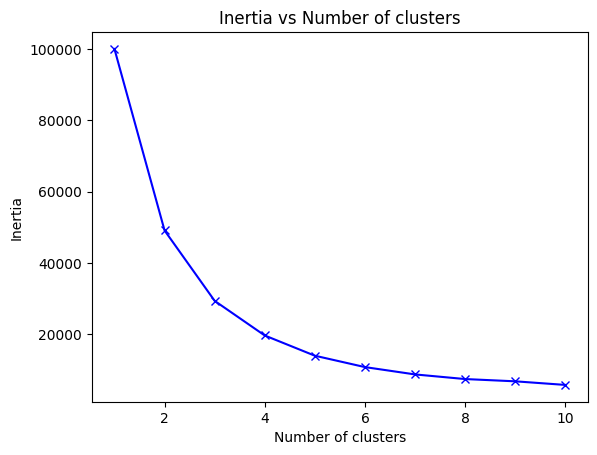

In [56]:
# Using matplotlib to plot the inertia versus k

plt.plot(k_range, inertia, 'bx-')

# Labelling the axes

plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

# Showing the figure
plt.title("Inertia vs Number of clusters")
plt.show()

In [57]:
# There is a sharp change in the gradient at k=2, however the curve continues to flatten more at k = 3 too. 
# Therefore i am using k = 3

In [58]:
# Fitting the final k-Means model with our chosen k=3

kmeans_final = KMeans(n_clusters = 3, random_state = 42, n_init = 1)
kmeans_final.fit(x_km_scaled)

# Using this fit to predict the cluster labels for each data point in the dataset

cluster_labels_pred = kmeans_final.predict(x_km_scaled)

# Importing the internal measures
    
from sklearn.metrics import davies_bouldin_score, silhouette_score
    
# Calculating the Davies-Bouldin index
    
db_score = davies_bouldin_score(x_km_scaled, cluster_labels_pred)

# Calculating the Silhouette coefficient

s_score = silhouette_score(x_km_scaled, cluster_labels_pred)

# Printing the results

print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.6881
Silhouette Coefficient: 0.4781


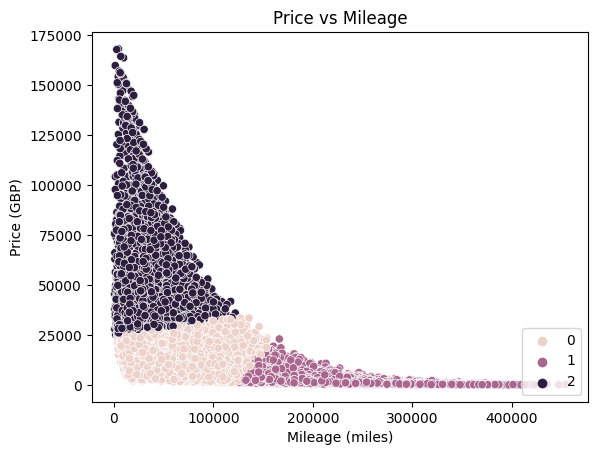

In [59]:
# Visualising the clusters in a scatter plot

sns.scatterplot(data = car_df, x = "Mileage", y = "Price", hue =cluster_labels_pred)

# Adding a legend to show the cluster labels

plt.legend(loc = "lower right")

# Labelling both axis

plt.xlabel("Mileage (miles)")
plt.ylabel("Price (GBP)")

# Showing the figure
plt.title("Price vs Mileage")
plt.show()

## Price vs Engine Size

In [60]:
# Extracting the input features

km1_feature_names = ["Engine size", "Price"]

x1_km = car_df[km1_feature_names]

# Import the StandardScaler class from sklearn

from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class

scale_km1 = StandardScaler()

# Fitting the standard scaler to the input data that we have in x

scale_km1.fit(x1_km)

# Apply the standard scaler transformation to re-scale each column in x

x1_km_scaled = scale_km1.transform(x1_km)

In [61]:
# Importing the k-Means model

from sklearn.cluster import KMeans

# Createing a list to record the inertia for each value of k

inertia = []

# Defining the range of values of k that we will use

k_range = range(1, 11)

# Looping through the possible values of k

for k in k_range:
    
# Initialising the model

    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 1)

# Fitting the model to the scaled data

    kmeans.fit(x1_km_scaled)

# Record the inertia

    inertia.append(kmeans.inertia_)

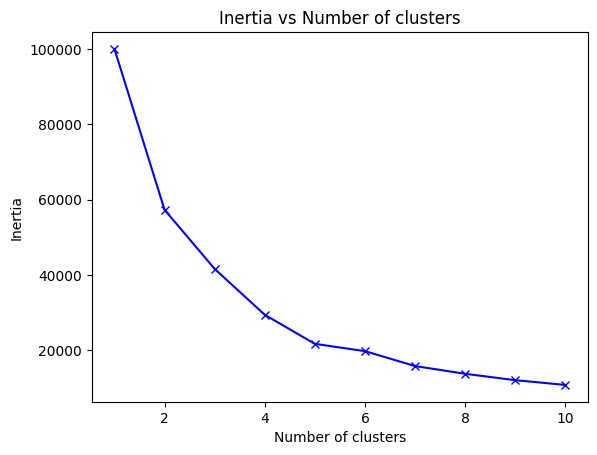

In [62]:
# Using matplotlib to plot the inertia versus k

plt.plot(k_range, inertia, 'bx-')

# Labelling the axes

plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

# Showing the figure
plt.title("Inertia vs Number of clusters")
plt.show()

In [63]:
# There is a sharp change in the gradient at k = 2, however the curve continues to flatten more at k = 5 
# Therefore i am using k = 5

In [64]:
# Fitting the final k-Means model with our chosen k = 5

kmeans_final = KMeans(n_clusters = 5, random_state = 42, n_init = 1)
kmeans_final.fit(x1_km_scaled)

# Using this fit to predict the cluster labels for each data point in the dataset

cluster_labels_pred = kmeans_final.predict(x1_km_scaled)

# Importing the internal measures
    
from sklearn.metrics import davies_bouldin_score, silhouette_score
    
# Calculating the Davies-Bouldin index
    
db_score = davies_bouldin_score(x1_km_scaled, cluster_labels_pred)

# Calculating the Silhouette coefficient

s_score = silhouette_score(x1_km_scaled, cluster_labels_pred)

# Printing the results

print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.7554
Silhouette Coefficient: 0.4317


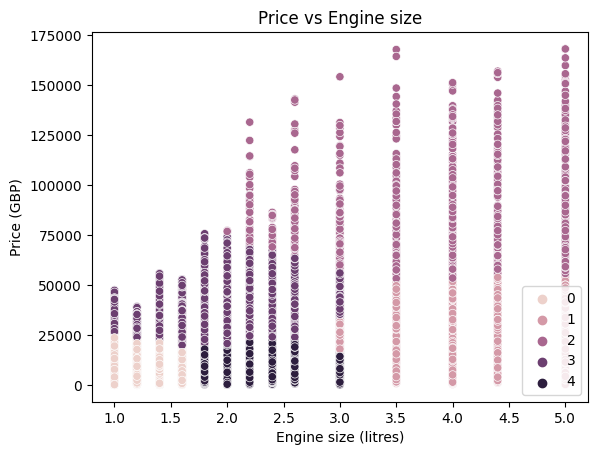

In [65]:
# Visualising the clusters in a scatter plot

sns.scatterplot(data = car_df, x = "Engine size", y = "Price", hue =cluster_labels_pred)

# Adding a legend to show the cluster labels

plt.legend(loc = "lower right")

# Labelling both axis

plt.xlabel("Engine size (litres)")
plt.ylabel("Price (GBP)")

# Showing the figure
plt.title("Price vs Engine size")
plt.show()

# QUESTION G

## Hierarchical Clustering model (Agglomerative clustering) - Price versus Mileage

In [66]:
# Extracting the input features

hc_feature_names = ["Mileage", "Price"]

x_hc = car_df[hc_feature_names]

# Scaling the input features

scale_hc = StandardScaler()

scale_hc.fit(x_hc)

x_hc_scaled = scale_hc.transform(x_hc)

In [67]:
# Importing the AgglomerativeClustering model from the sklearn library

from sklearn.cluster import AgglomerativeClustering

# Creating an instance of the AgglomerativeClustering class, with 3 clusters and complete linkage

agg_model = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')

# Fitting the model to our dataset

agg_labels_pred = agg_model.fit_predict(x_hc_scaled)

# Applying the evaluation metrics

# Calculating the Davies-Bouldin index

db_score = davies_bouldin_score(x_hc_scaled, agg_labels_pred)

# Calculating the Silhouette coefficient

s_score = silhouette_score(x_hc_scaled, agg_labels_pred)

# Printing the results

print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.5643
Silhouette Score: 0.4329


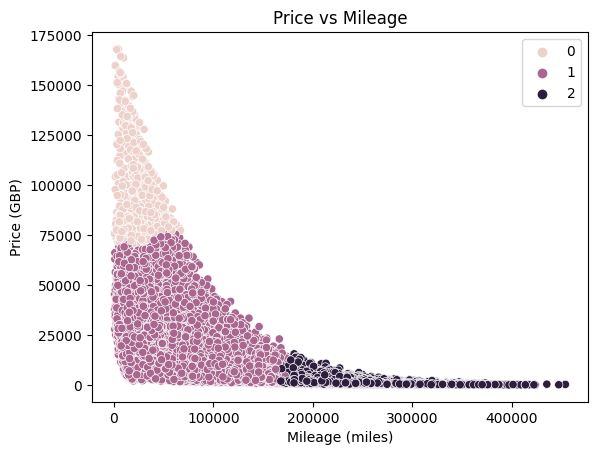

In [68]:
# Visualising the clusters in a scatter plot of Price versus Mileage

sns.scatterplot(data = car_df, x = "Mileage", y = "Price", hue = agg_labels_pred)

# Labelling both axes

plt.xlabel("Mileage (miles)")
plt.ylabel("Price (GBP)")

# Showing the figure
plt.title("Price vs Mileage")
plt.show()

## DBSCAN - Price vs Mileage

In [69]:
# Extracting the input features

db_feature_names = ["Mileage", "Price"]

x_db = car_df[db_feature_names]

# Scaling the input features

scale_db = StandardScaler()

scale_db.fit(x_db)

x_db_scaled = scale_hc.transform(x_db)

In [70]:
# Importing the DBSCAN model from sklearn

from sklearn.cluster import DBSCAN

# Creating an instance of the DBSCAN class, and setting the eps and min_samples parameters

dbscan = DBSCAN(eps=0.2, min_samples=3)

# Fitting the model to the input data and output the predicted cluster labels from this model

dbscan_labels_pred = dbscan.fit_predict(x_db_scaled)

# Calculating the Davies-Bouldin index

db_score = davies_bouldin_score(x_db_scaled, dbscan_labels_pred)

# Calculating the Silhouette coefficient

s_score = silhouette_score(x_db_scaled, dbscan_labels_pred)

# Printing the results

print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.1570
Silhouette Coefficient: 0.8178


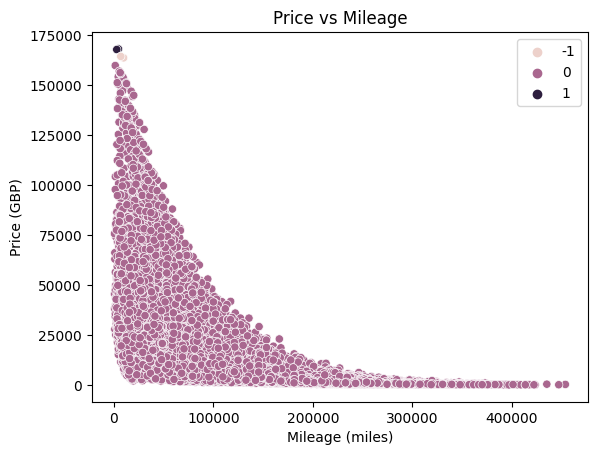

In [71]:
# Visualising the clusters

sns.scatterplot(data = car_df, x = "Mileage", y = "Price", hue =dbscan_labels_pred)

# Labelling both axes

plt.xlabel("Mileage (miles)")
plt.ylabel("Price (GBP)")

# Showing the plot
plt.title("Price vs Mileage")
plt.show()